In [1]:
import torch

In [2]:
import scipy.io as sio
from scipy.interpolate import interp1d
from scipy import interpolate
import scipy
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib.widgets import TextBox
import matplotlib.cm as cm
import matplotlib.image as mpimg 
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.colors
from matplotlib.pyplot import show 


# Retrieve pickle and csv data

In [144]:
## pickle ##
import pickle

file = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/robin_data_tensor_dump.pkl', 'rb')
filtered_data_to_tensor = pickle.load(file)
amplitude_filtereddata_to_tensor  = pickle.load(file)
peak2peak_data_to_tensor = pickle.load(file)

file.close()



In [149]:
# to retrieve ##
mt_electrodes = pd.read_csv('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_electrodes.csv')
mt_muscles= pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_muscles.csv")
unique_amplitudes=pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/unique_amplitudes.csv")

# Save figure

In [505]:
def save_figure(folder_name, data_file):
    """
    A function to get the number for the heatmap by by taking the  electric current at the point where afferent recruitment reaches 100%.
    
    Parameters
    ----------
    folder_name
        which folder should it be saved to? eg. recruitment/roots
    data_file
        name of plot
    """
    data_folder = f"/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/plots/"
    save_folder = os.path.join(data_folder,folder_name)
    os.makedirs(save_folder,exist_ok=True)
    data_file_path = os.path.join(save_folder,data_file)
    plt.savefig(data_file_path, transparent = "False",  
    facecolor='w',
    bbox_inches='tight'
    )

# Filtered EMG

Plot the raw values,thus for every electrode-muscle combination you have a curve for every amplitude for that combination


In [ ]:
def get_raw_emg_per_electrode(filtered_data_to_tensor=filtered_data_to_tensor,amplitude_filtereddata_to_tensor=amplitude_filtereddata_to_tensor,  save_fig=0, mt_electrodes=mt_electrodes):
    """
    A function to create recruitment curves by electrode

    Parameters
    ----------
    filtered_data_to_tensor
        EMG data used for the recruitment curve, set by default
    amplitude_filtereddata_to_tensor
        Amplitudes used for the recruitment curve, set by default

    save_fig
        int, if set to 1 save figure
    mt_electrodes
        pandas df, all ellectrodes used in data
    mt_muscles
        pandas df, all muscles used in data


    """



    for elec_i in range (0, len(mt_electrodes[0:1])):
        fig, ax = plt.subplots(figsize=(10,7))
        for muscle_i in range (len(mt_muscles[0:1])):
            for amplitude_i in range (0, len(amplitude_filtereddata_to_tensor[elec_i, muscle_i, :])):
                colors = cm.rainbow(np.linspace(0, 1, len(amplitude_filtereddata_to_tensor[elec_i, muscle_i, :])))
                # if no values for that amplitude break for loop
                if np.isnan(np.array(amplitude_filtereddata_to_tensor[elec_i, muscle_i, amplitude_i])):
                    continue
                # Define variables for plotting
                x = np.arange(0, len(filtered_data_to_tensor[elec_i, muscle_i, amplitude_i, 0, :]))
                y = filtered_data_to_tensor[elec_i, muscle_i, amplitude_i, 0, :]
        
    
                # Plot the data points
                plt.plot(x,  y, '-', c=colors[amplitude_i], label= unique_amplitudes["amplitudes"][amplitude_i]) 
                
            
 
            plt.legend(title="Amplitude of current [mA]")
            # Set label and scale
            ax.set_xlabel("Timepoints [in 100 ms]") # freq. rate = 10kHz, 1000 time points
            # ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
            ax.set_ylabel(f"filtered EMG [mV]")
            # ax.set_xticks(ticks=np.linspace(0, 100))

            # Plotting settings
            # ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
            ax.set_title(f"Filtered EMG for elec: {elec_i} and muscle: {mt_muscles['muscle_name'][muscle_i]} ")
            

        ## save plots ##
        if save_fig:
            folder_name="Raw_EMG"
            data_file="elec"+"_"+str(elec_i)+"_"+"raw_emg"+'.png'
            save_figure(folder_name, data_file)

            plt.show()
    
       


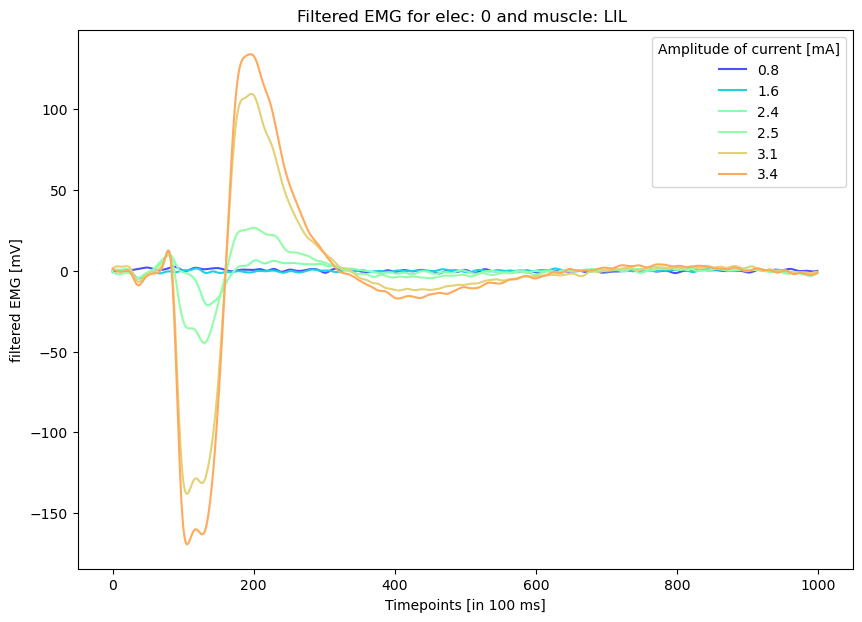

In [30]:
get_raw_emg_per_electrode(save_fig=1)


# EMG Processing -Recruitment curves

For the rectuitment curve per electrode, you have one value ( the peak to peak value) per amplitude for the different muscles.

### Recruitment per elec

In [223]:
def get_recruitment_curve_per_electrode(peak2peak_data_to_tensor=peak2peak_data_to_tensor,amplitude_filtereddata_to_tensor=amplitude_filtereddata_to_tensor,  save_fig=0, mt_electrodes=mt_electrodes):
    """
    A function to create recruitment curves by electrode

    Parameters
    ----------
    peak2peak_data_to_tensor
        Peak to peak values of EMG data, used for the recruitment curve, set by default
    amplitude_filtereddata_to_tensor
        Amplitudes used for the recruitment curve, set by default

    save_fig
        int, if set to 1 save figure
    mt_electrodes
        pandas df, all ellectrodes used in data
    mt_muscles
        pandas df, all muscles used in data


    """

    colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
    label=mt_muscles["muscle_name"]

    for elec_i in range (0, len(mt_electrodes)):
        fig, ax = plt.subplots(figsize=(10,7))
        for muscle_i in range (len(mt_muscles)):

            # Define variables for plotting
            x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
            y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
        
            
            # Remove nan values
            x_without_nan=np.array(x)
            x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
            y_without_nan=np.array(y)
            y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

            # Plot the data points
            plt.plot(x_without_nan,  y_without_nan, 'o-', c=colors[muscle_i], label= mt_muscles['muscle_name'][muscle_i]) 
            
            # Add text descripiton to the points for visibility
            for index in range (len(x_without_nan)):
                ax.text(x_without_nan[index], y_without_nan[index], label[muscle_i], size=10) 
            
            
            # Set label and scale
            ax.set_xlabel("Amplitude [mA]")
            ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
            ax.set_ylabel(f"Peak to peak value [mV]")
            ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

        # Plotting settings
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title="muscles")
        ax.set_title(f"Recruitment curve for elec: {elec_i}")



        ## save plots ##
        if save_fig:
            data_file = "elec"+"_"+str(elec_i)+"_"+"recruitment_curve"+'.png'
            folder_name="recruitment_curve/muscles/recruitment_per_elec"
            save_figure(folder_name, data_file)

        plt.show()


In [229]:
np.nanmax(np.array(peak2peak_data_to_tensor[:, 0, :, 0, 0]))

0.8170257

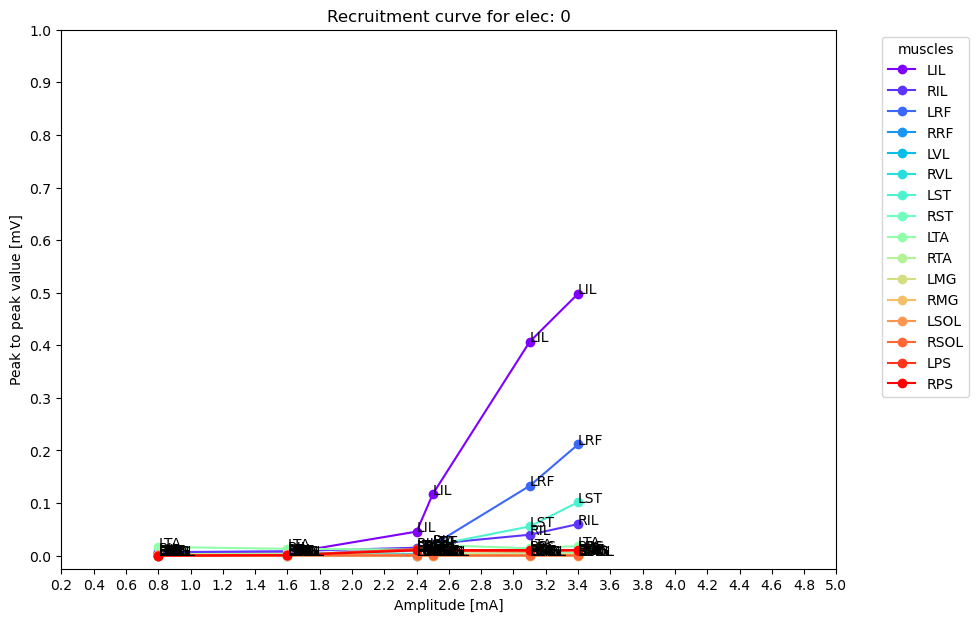

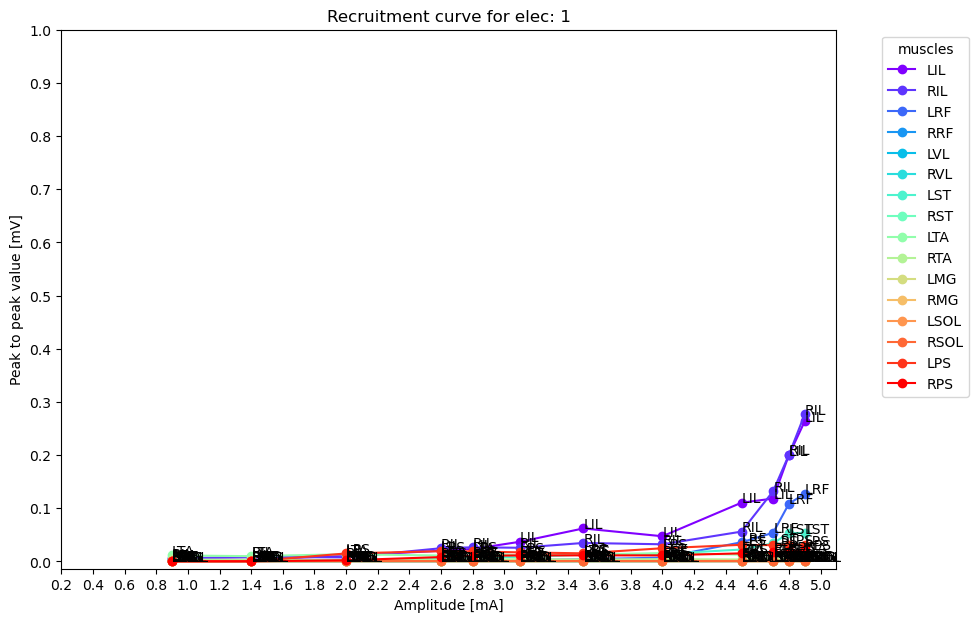

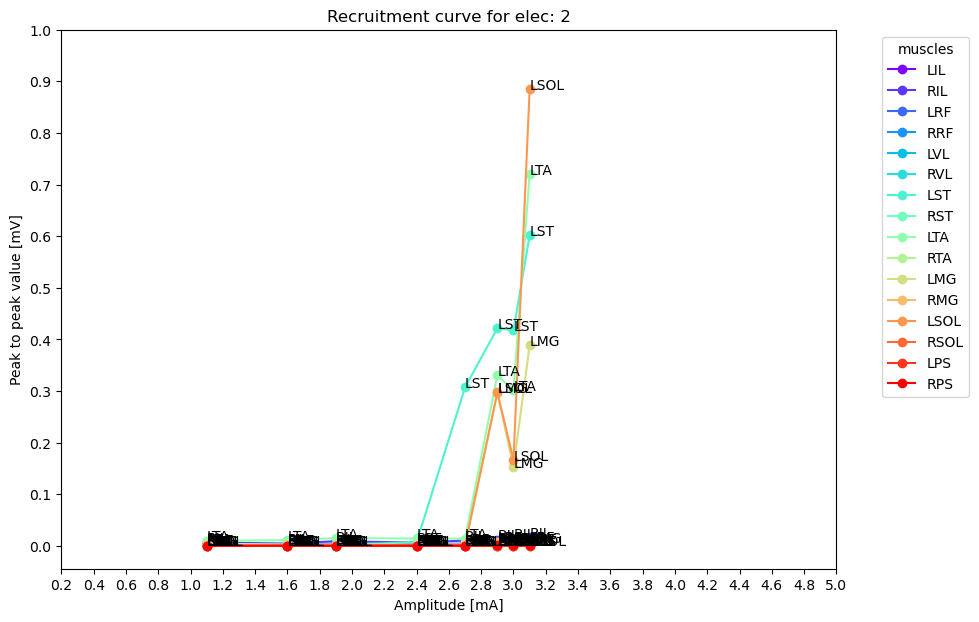

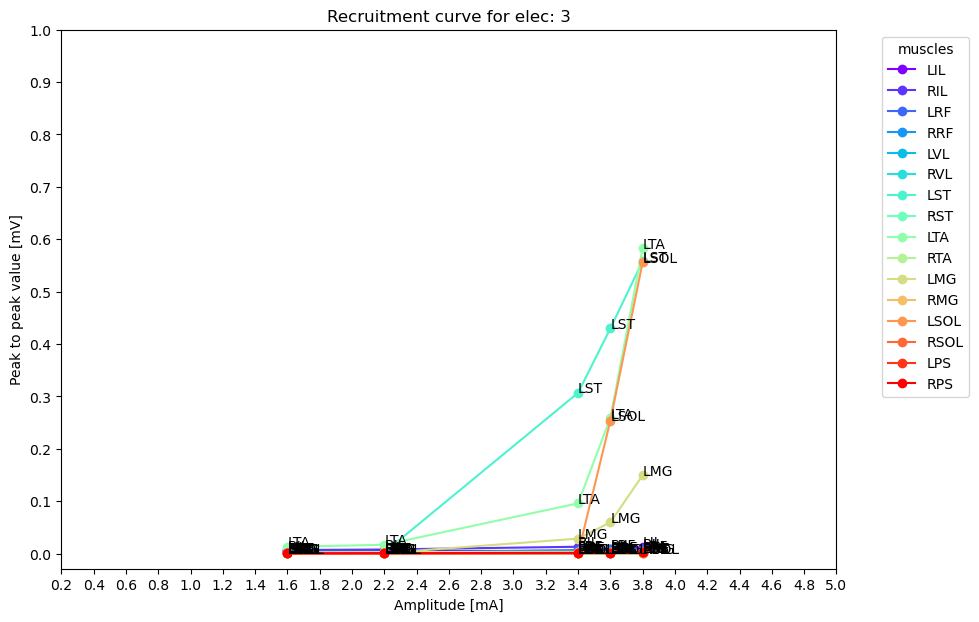

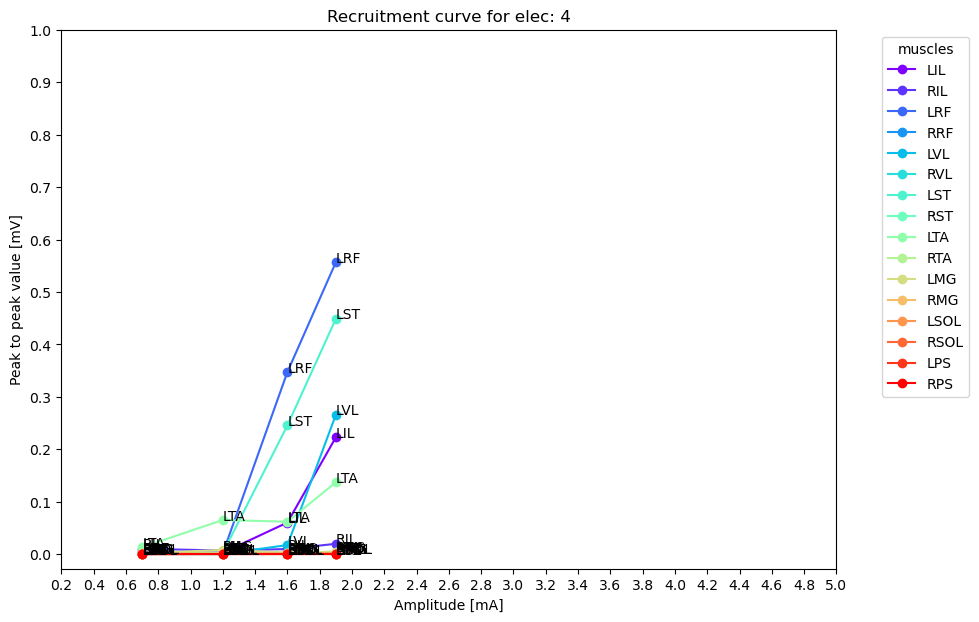

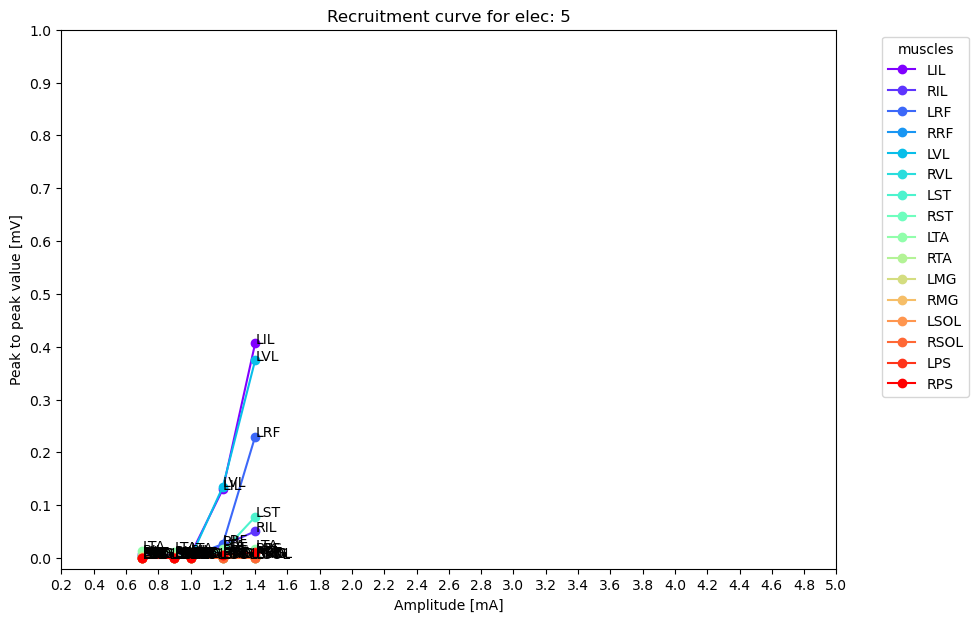

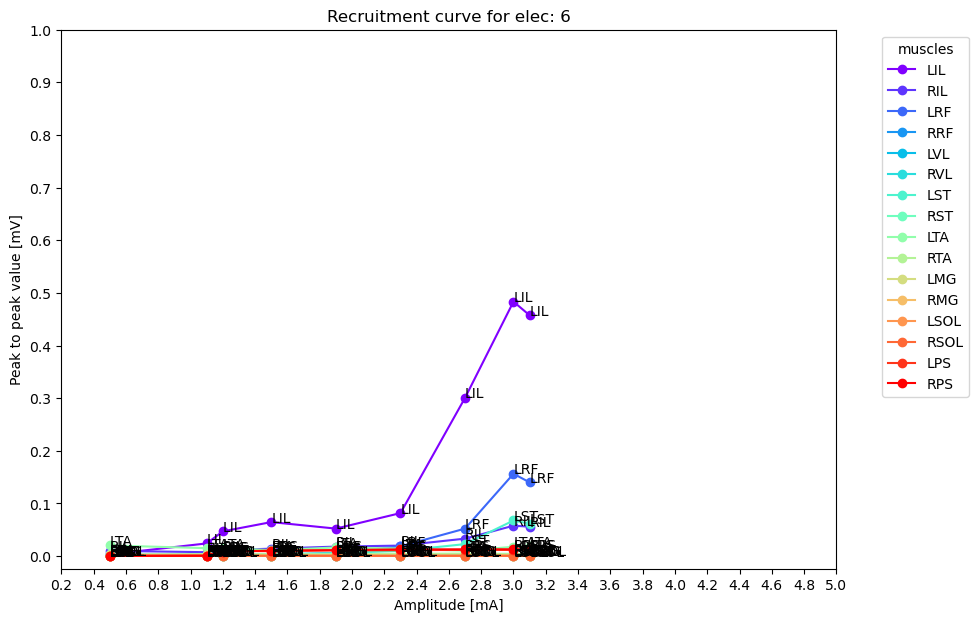

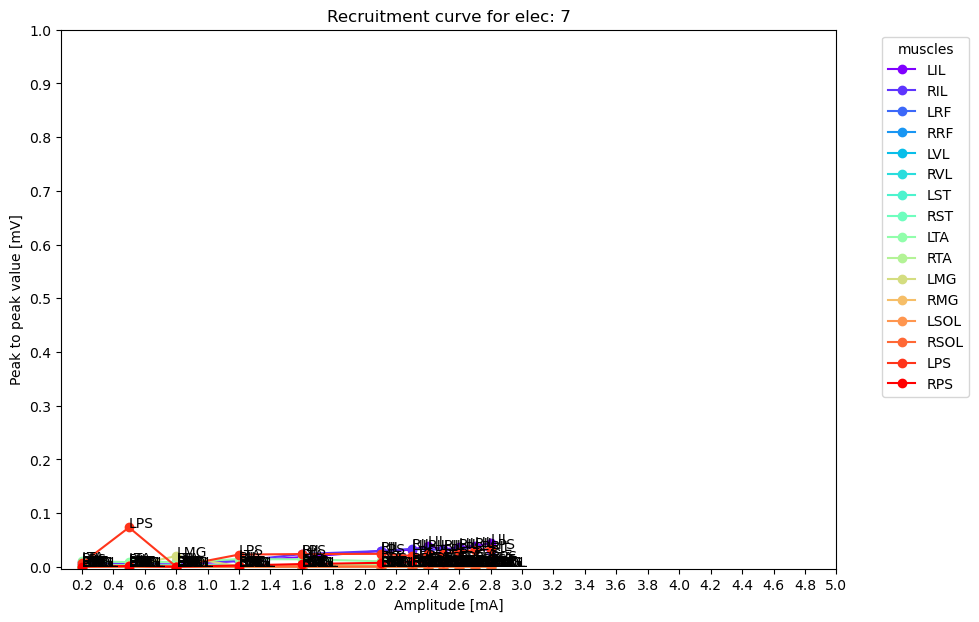

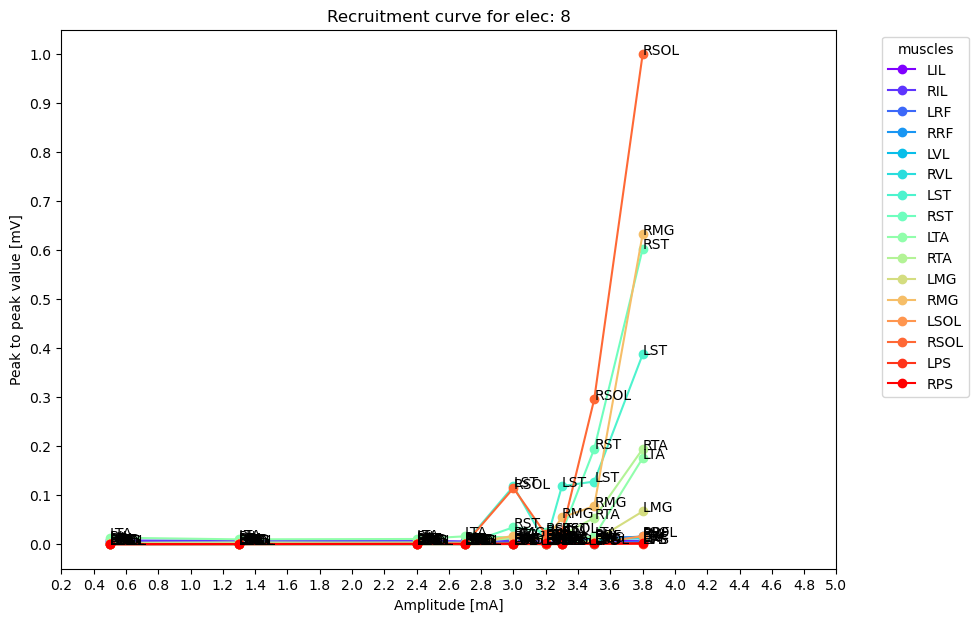

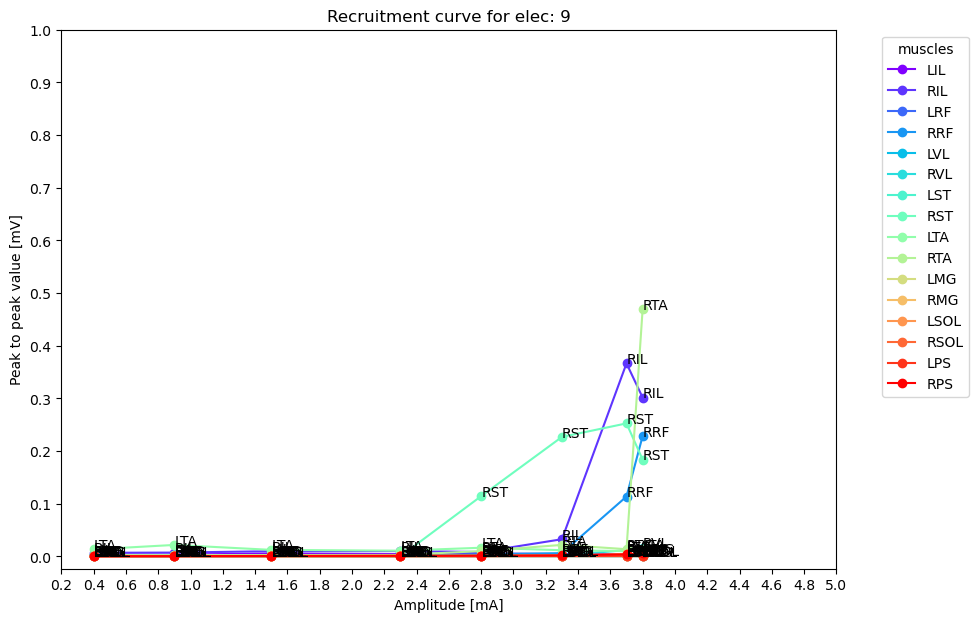

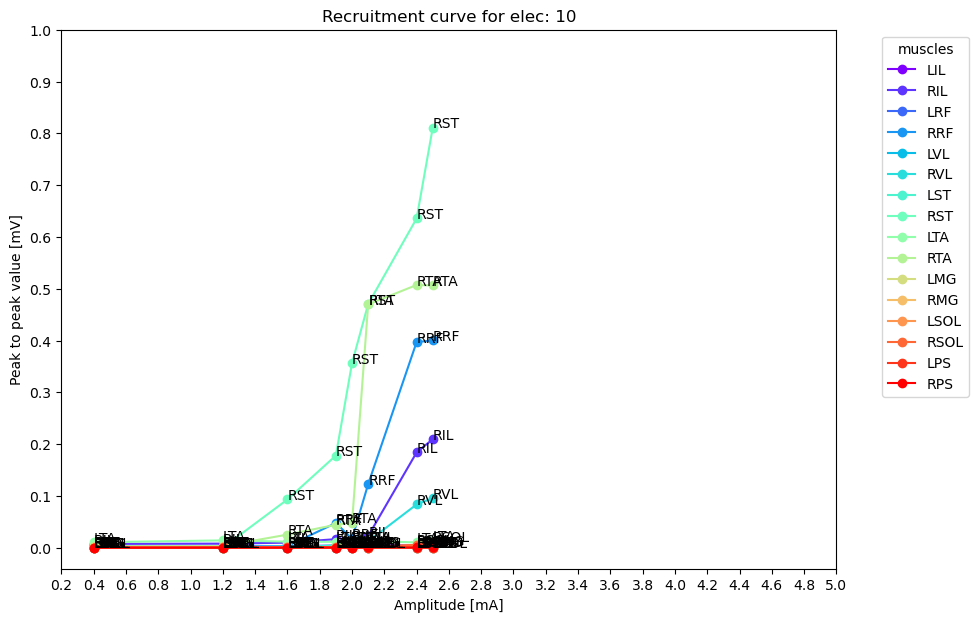

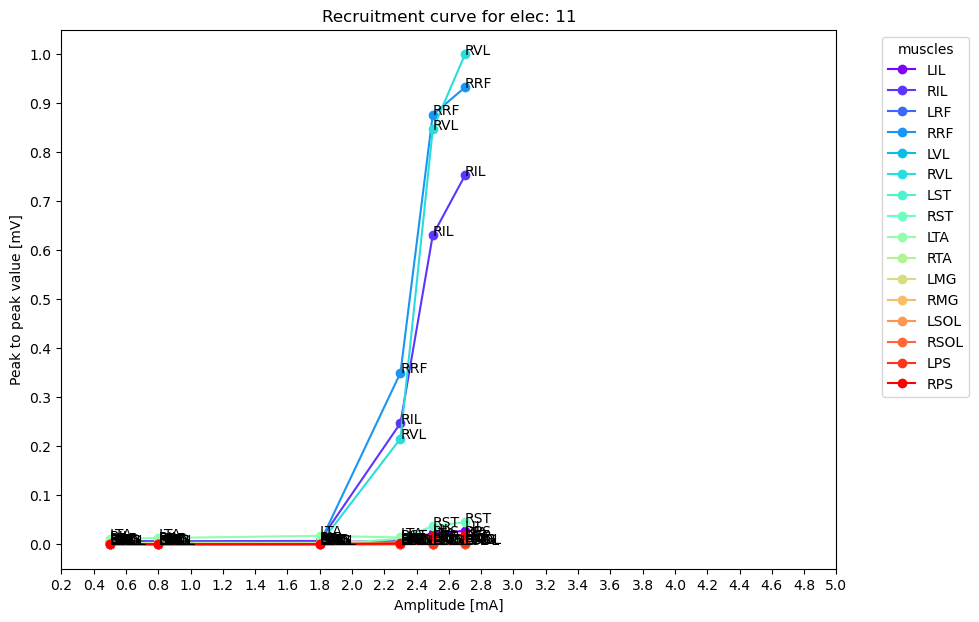

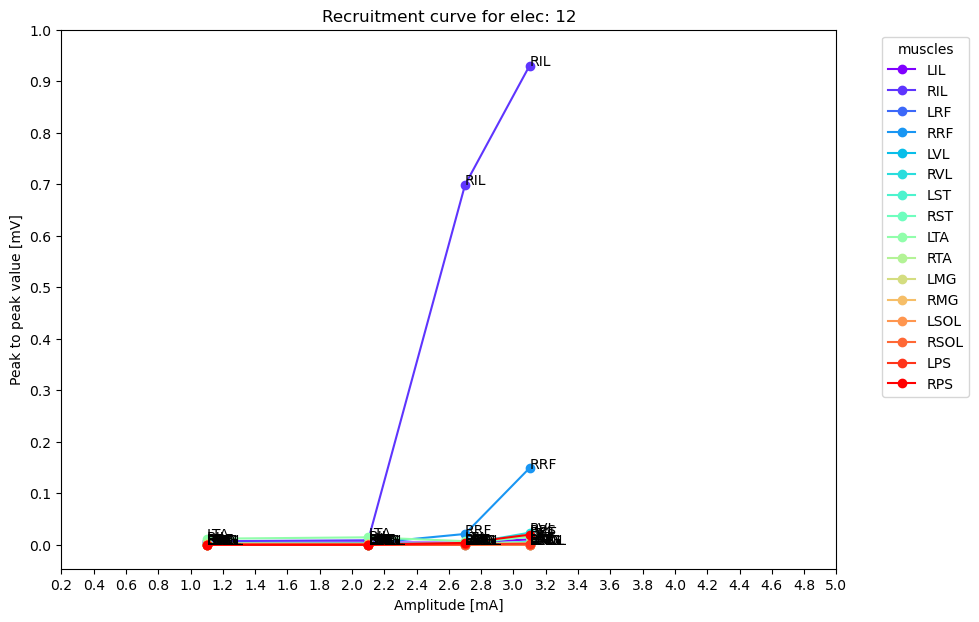

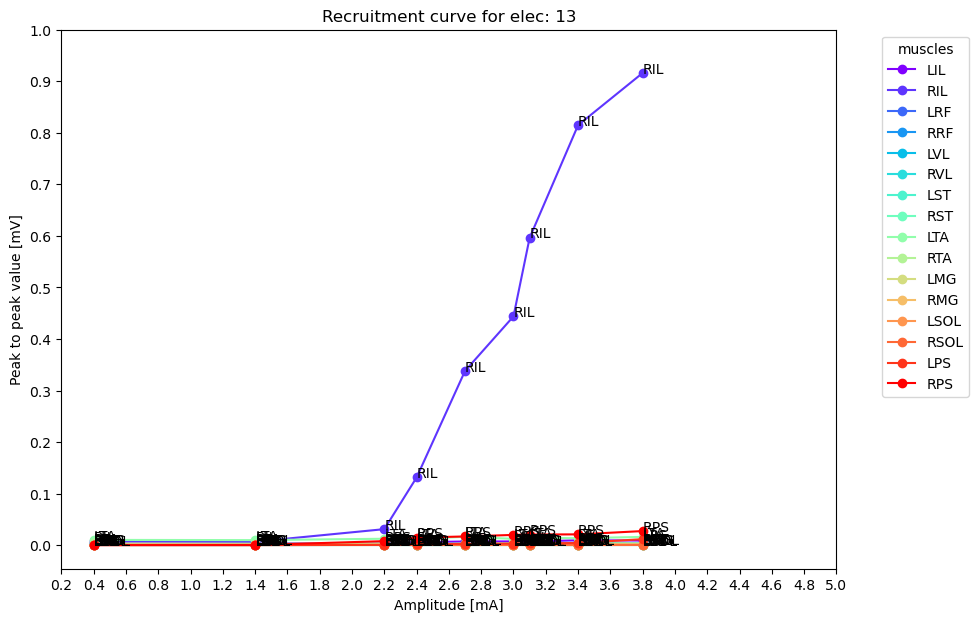

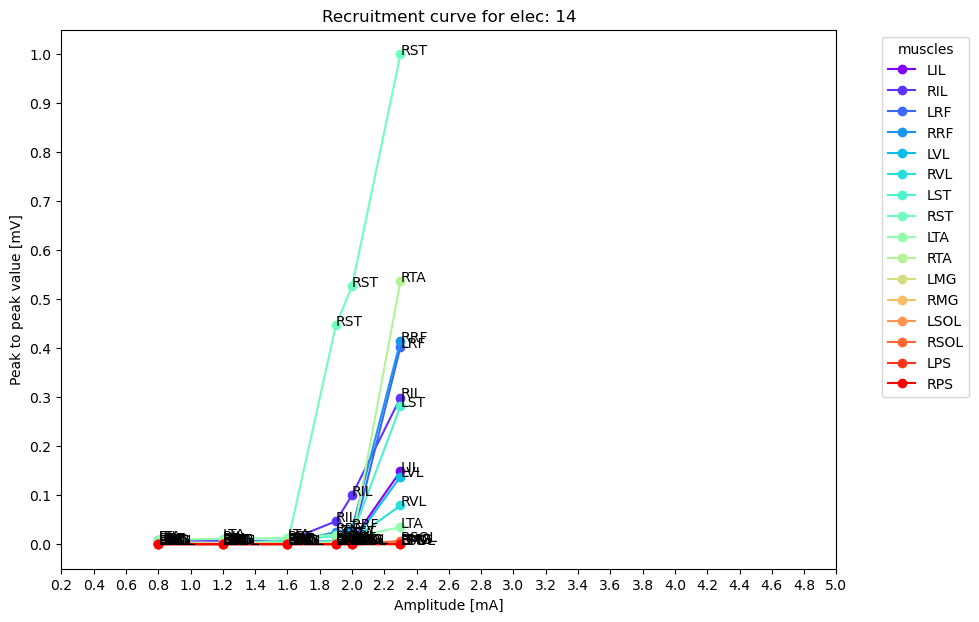

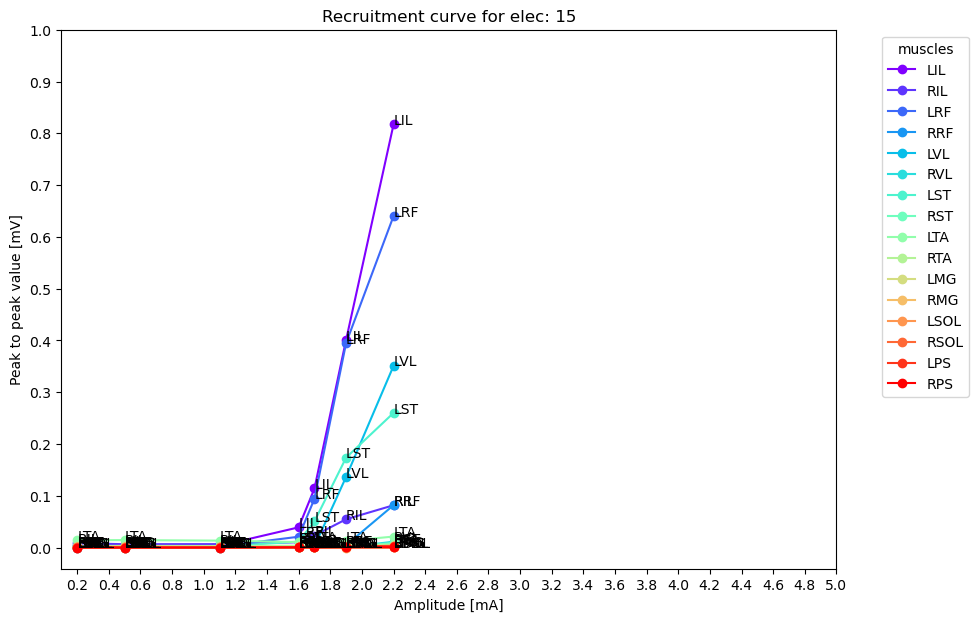

In [224]:
get_recruitment_curve_per_electrode()

### Recruitment per muscle 

In [226]:

def get_recruitment_curve_per_muscles(peak2peak_data_to_tensor=peak2peak_data_to_tensor,amplitude_filtereddata_to_tensor=amplitude_filtereddata_to_tensor,  save_fig=0, mt_electrodes=mt_electrodes):
    """
    A function to create recruitment curves by muscle. 

    Parameters
    ----------
    peak2peak_data_to_tensor
        EMG data used for the recruitment curve, set by default
    amplitude_filtereddata_to_tensor
        Amplitudes used for the recruitment curve, set by default

    save_fig
        int, if set to 1 save figure
    mt_electrodes
        pandas df, all ellectrodes used in data
    mt_muscles
        pandas df, all muscles used in data


    """

    colors = cm.rainbow(np.linspace(0, 1, len(mt_electrodes)))
    label=mt_electrodes["elec_name"]

    for muscle_i in range (len(mt_muscles)):
        fig, ax = plt.subplots(figsize=(10,7))
        for elec_i in range (0, len(mt_electrodes)):
        
            # Define variables for plotting
            x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
            y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
        
            
            # Remove nan values for the text index
            x_without_nan=np.array(x)
            x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
            y_without_nan=np.array(y)
            y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

            # Plot the data points
            plt.plot(x_without_nan, y_without_nan, 'o-', c=colors[elec_i],  label=mt_electrodes['elec_name'][elec_i]) 
                
            # Add text descripiton to the points for visibility
            for index in range (len(x_without_nan)):
                ax.text(x_without_nan[index], y_without_nan[index], label[elec_i], size=10) 
            
        
            # Set label and scale
            ax.set_xlabel("Amplitude [mA]")
            ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
            ax.set_ylabel(f"Peak to peak value [mV]")
            ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

        # Plotting settings
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title= "electrodes")
        ax.set_title(f"Recruitment curve for muscle {mt_muscles['muscle_name'][muscle_i]}")

        ## save plots ##
        if save_fig:
            data_file = mt_muscles['muscle_name'][muscle_i]+"_"+"recruitment_curve"+'.png'
            folder_name="recruitment_curve/muscles/recruitment_per_msc"
            save_figure(folder_name, data_file)
            print (f"yay for {muscle_i}")

    plt.show()

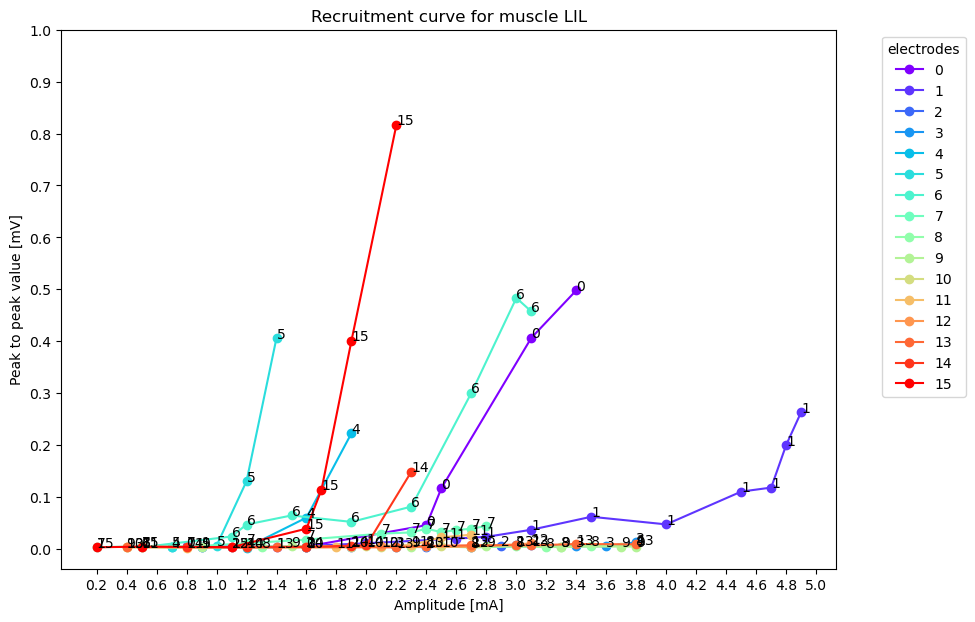

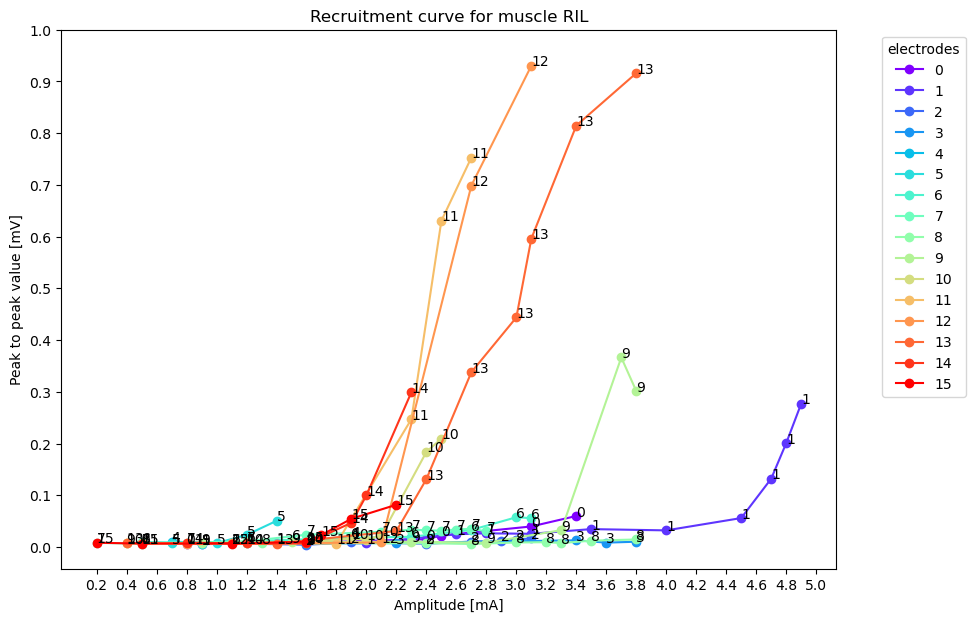

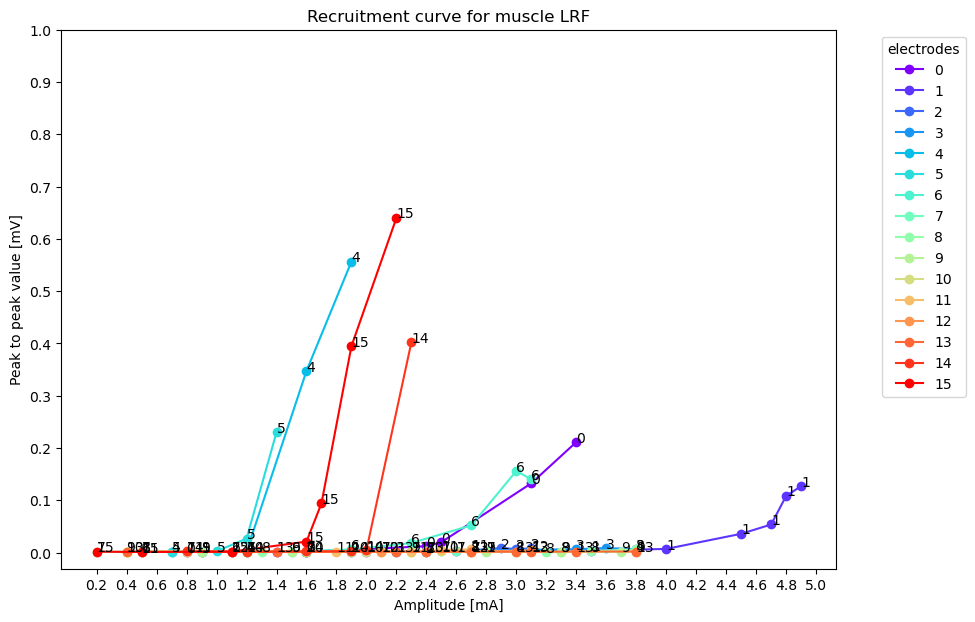

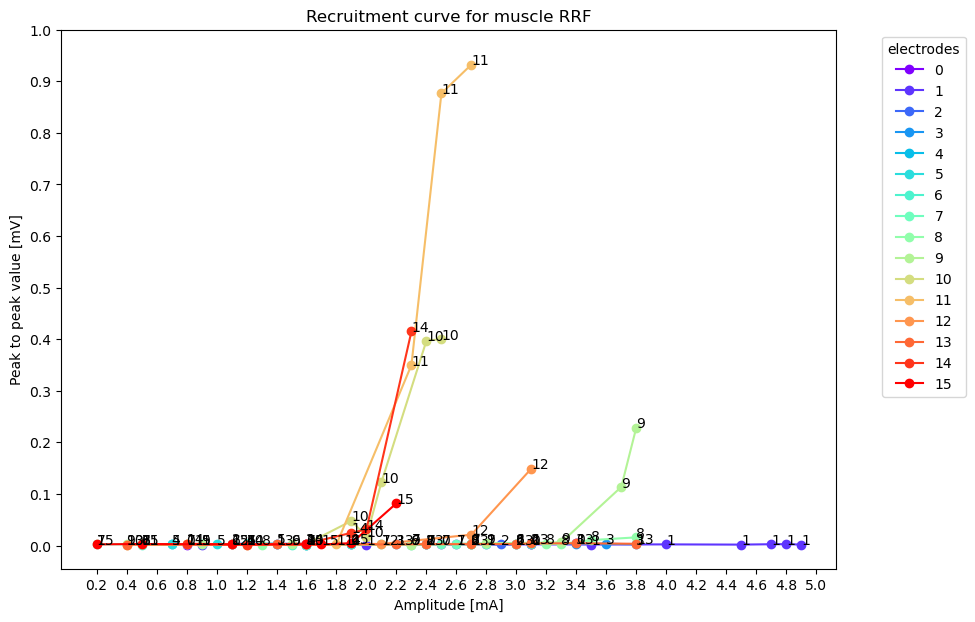

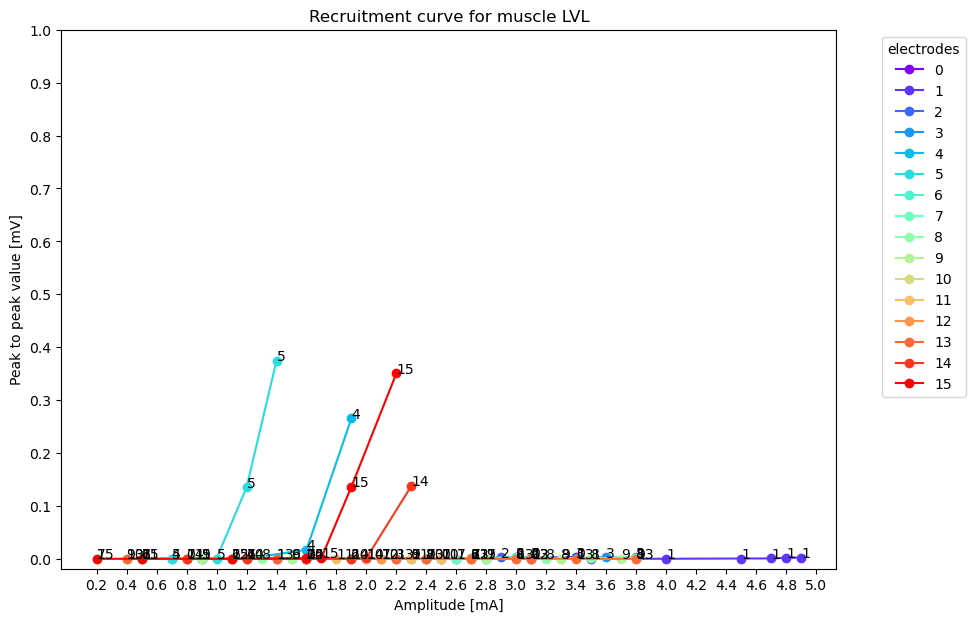

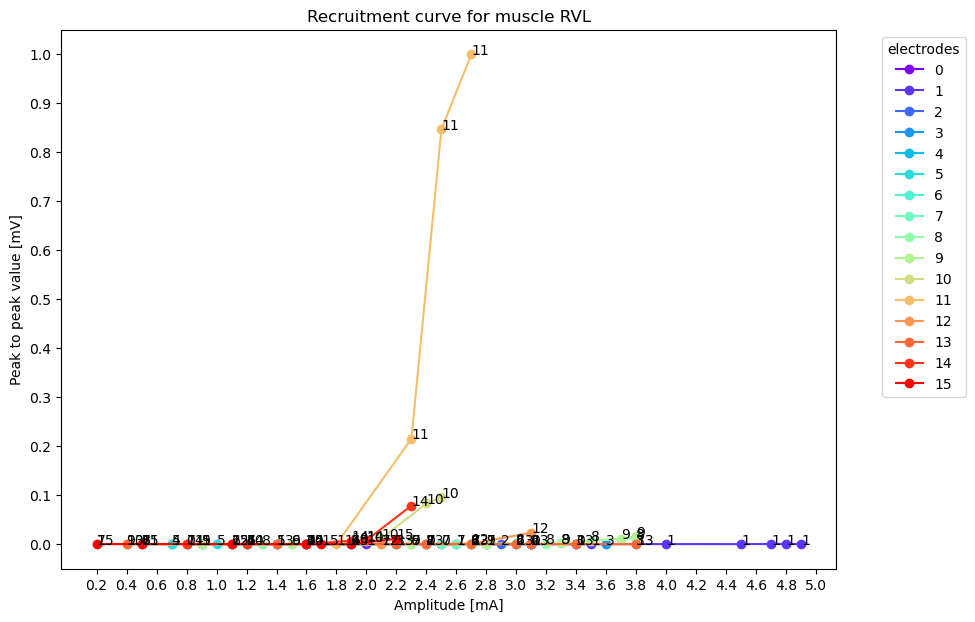

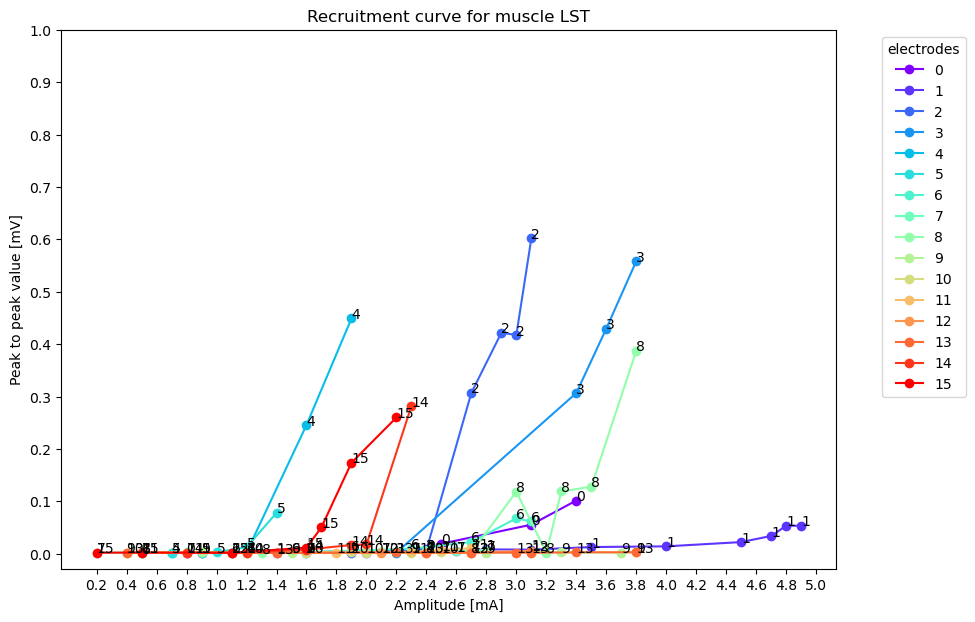

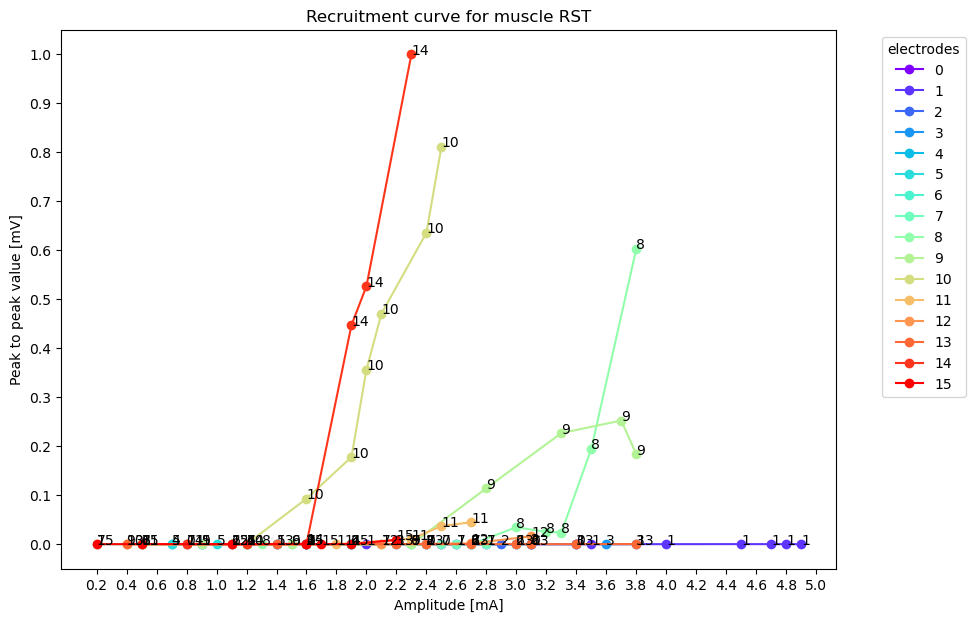

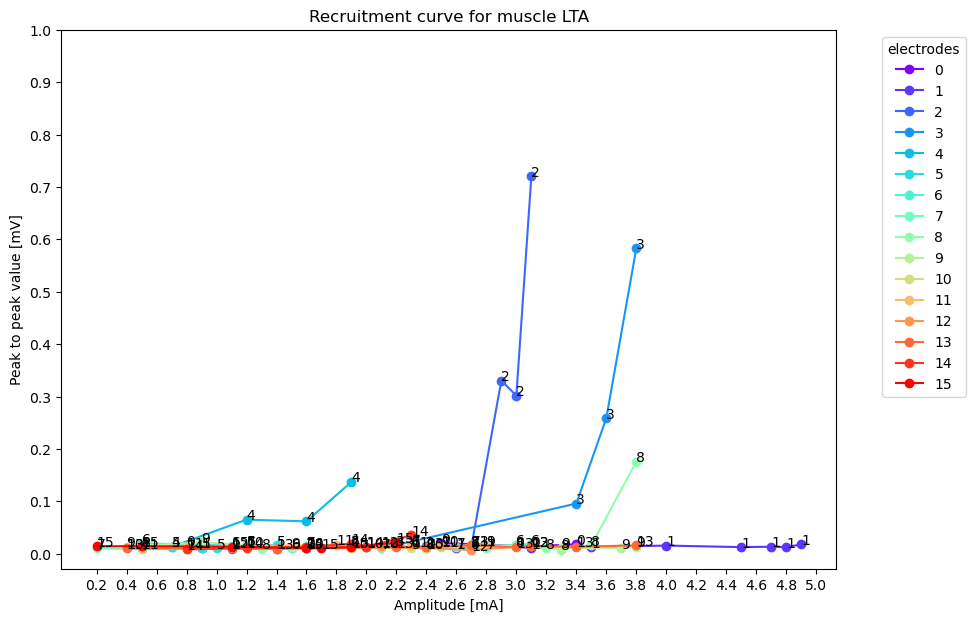

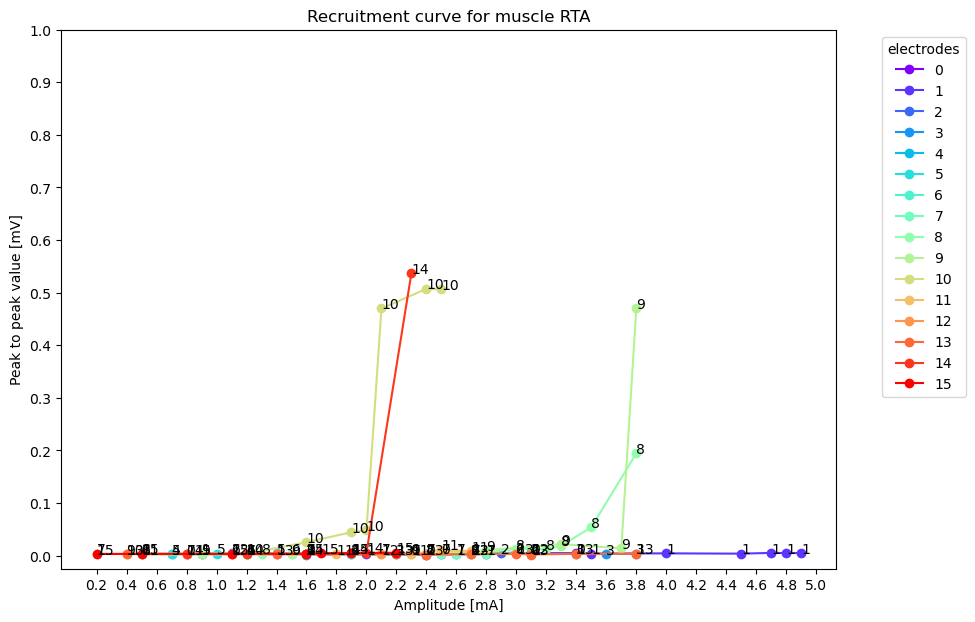

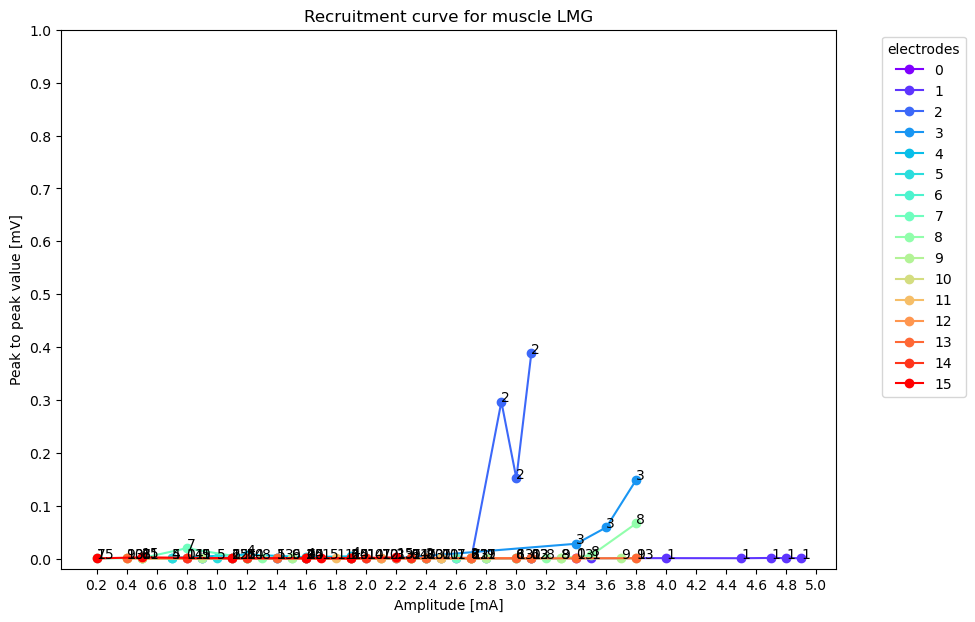

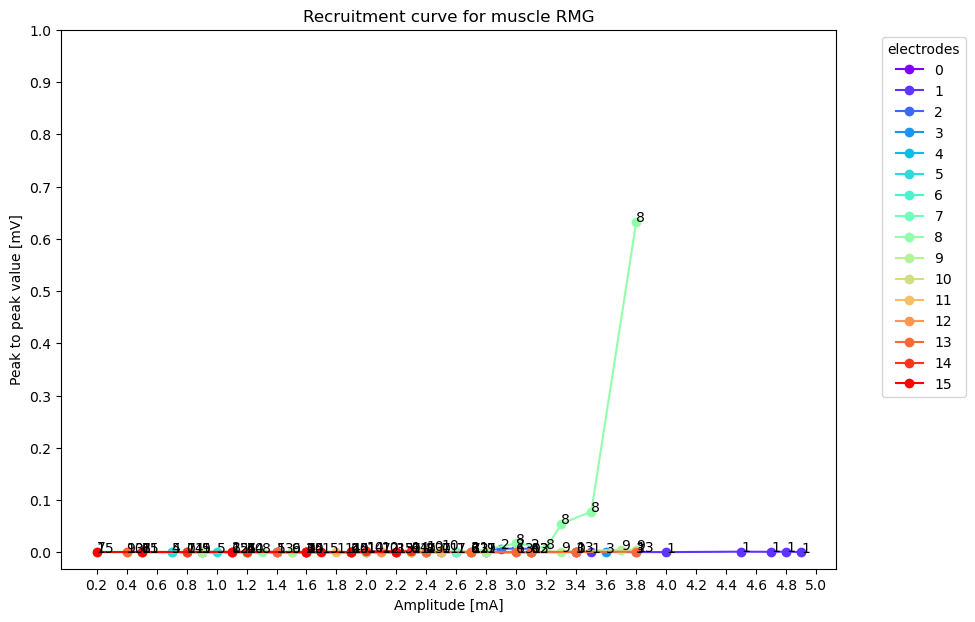

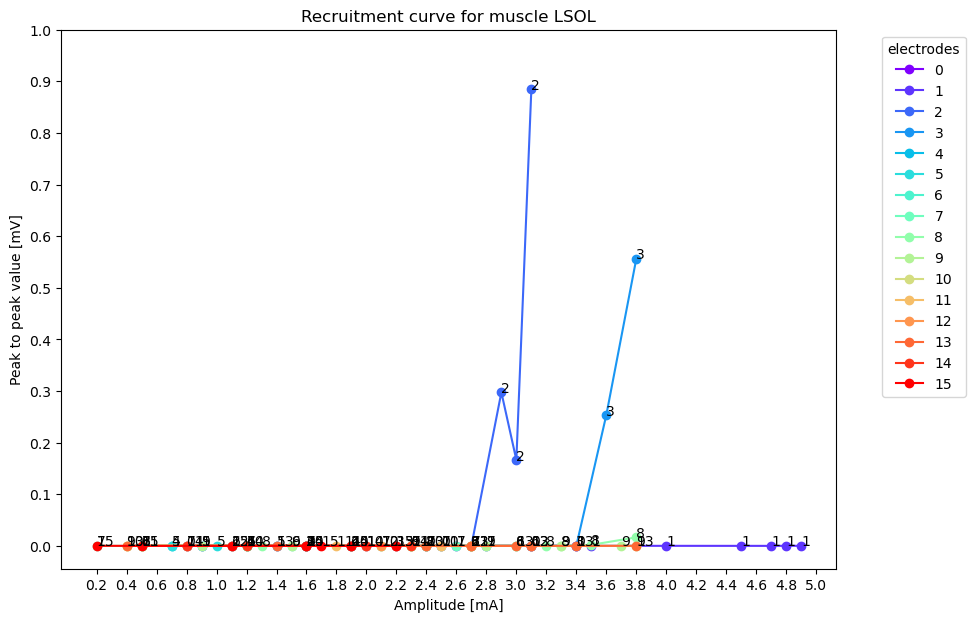

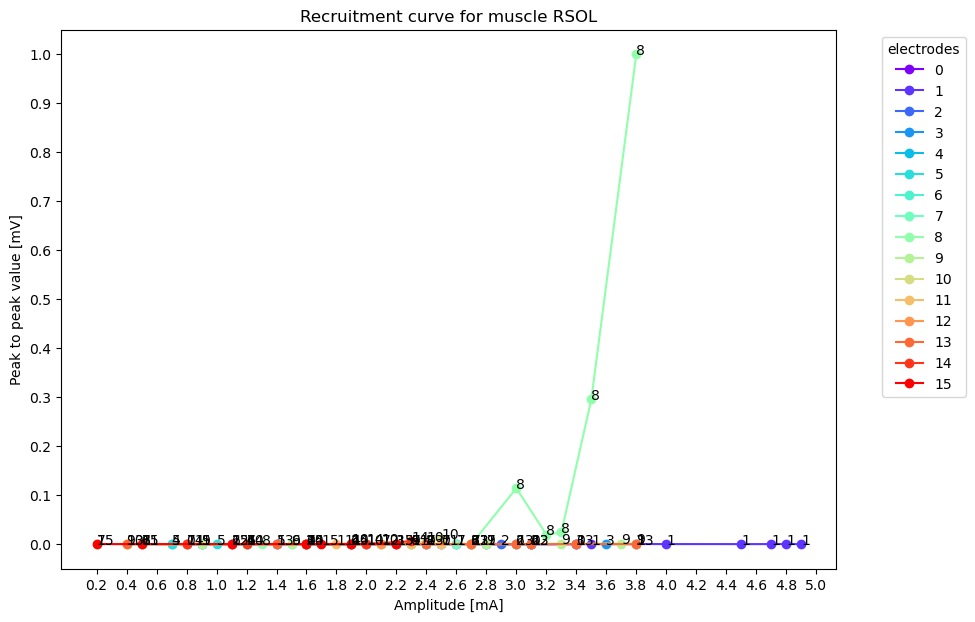

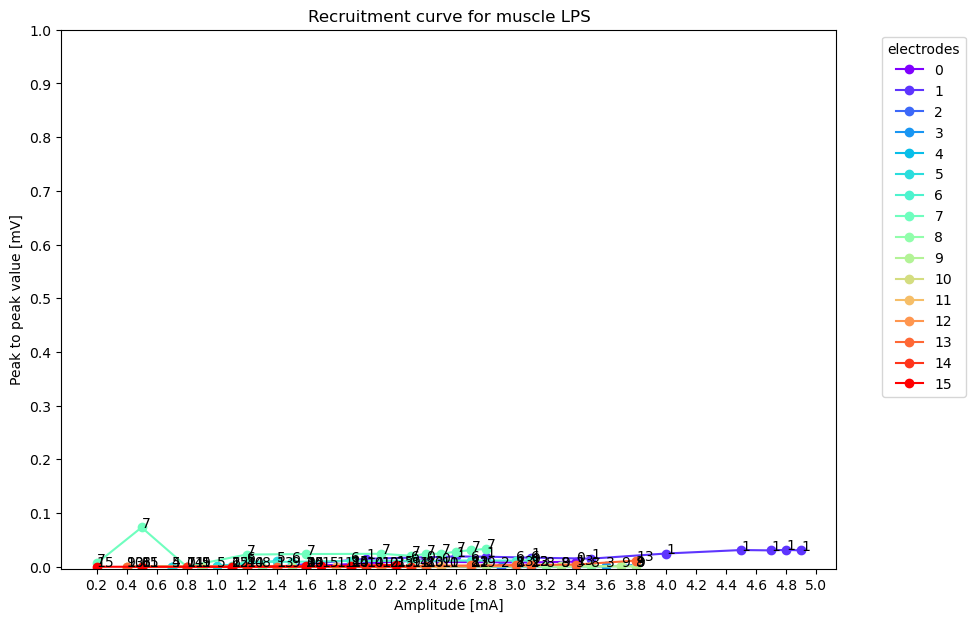

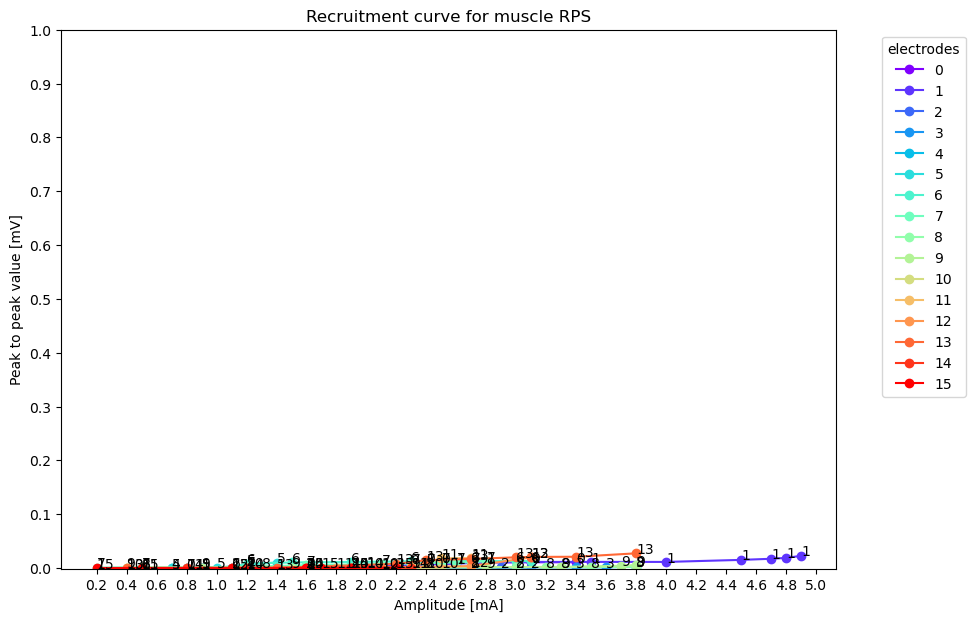

In [227]:
get_recruitment_curve_per_muscles()

## Recruitment with Integral values

On hold for now, evt. later to check results
We would use time series for now (not peak to peak values)

In [ ]:

# y are tiem_points of one time series , take abs value
y=abs(filtered_data_to_tensor[7, 0, 4 ,0, :])
x= np.arange(0, len(y))
scipy.integrate.simps(y, x, dx=1, axis=- 1, even='avg')


605.7151865034102

# Muscle recruitment processing

For now there are two possibibilites 

**A: Heatmap**

Since there is an inconsistent sweep of amplitudes between the electrodes (some elctrodes are not stimulating as high as others) it's hard to compare the activation of the muscle between the electrodes and define the electrode(s) that predominantly activate a certain muscle.
Thus here we have different approaches to solve this problem:

Normalisation methods:

- Normalise by amplitude:
    - for peak to peak values: max output(max activation) / input(amp) at max activation
    - for integral (hasn't been done yet): output int /input (amp) bim max 
- Normalise by max value
- Selectivity index (described in paper)(not done yet) (not recommended)


**B: Fit recruitment to sigmoids**

Here the insconsistent sweep is less of an issue, since we are eitherway interpolating the values with our fit.


# A: Heat map

## Normalisation


### normalise_max_P2P_div_amp

For every muscle electrode combination the max muscle response is divided by the ampliude at that point. 
However with this method we don't take into account the impedance. There's a big variability between the different electrodes (eg  impedance given by tissue btw elec and return.  eg air bubble etc )
After having done the normalisation by amplitude, there is a problem with the low values for the interpolation: values between 0 and 1 will be rounded to zero. Thus we have to multiply it by 100 before interpolating
and change the plotting scale (vmin, and vmax) to 0 to 100, thus we should get to the same results and in the heatmap without interpolation where data_1 was used, and vmin=0 and vmax=1.


In [ ]:
def set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
    """"
    Function to get a number for the heat map

    Parameters
    ----------
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default

    Output
    ----------
    data_normalised
        numpy array of values "normalised"
    """"

    data_normalised=np.zeros((len(mt_muscles["muscle_name"]),len(mt_electrodes["elec_name"])))
    for muscle_i in range(0, len(mt_muscles)):
        for elec_i in range (0, len(mt_electrodes)):
            ## Find max value for one combination
            max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
            ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
            max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
        
            max_value_normalised=np.divide(max_value,max_value_amplitude)
            data_normalised[muscle_i][elec_i]=max_value_normalised
    
    print("normalisation method is: normalise_max_P2P_div_amp")
    return data_normalised


### normalise_by_max_response



Idea of Robin : across all elecs,  take max response in the muscle (peak to peak ?, at any amp?)
and normalise by that. Here we take into account the impendance difference between the different electrodes.

In [ ]:
def set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
    """"
    Function to get a number for the heat map

    Parameters
    ----------
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default

    Output
    ----------
    data_normalised
        numpy array of values "normalised"
    """

    data_normalised=np.zeros((len(mt_muscles["muscle_name"]),len(mt_electrodes["elec_name"])))
    for muscle_i in range(0, len(mt_muscles)):
        for elec_i in range (0, len(mt_electrodes)):
            ## Find max response in the muscle
            max_value_for_muscle=np.nanmax(peak2peak_data_to_tensor[:, muscle_i, :, 0, 0])
            max_value_normalised=np.divide(np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]), max_value_for_muscle)
        
            data_normalised[muscle_i][elec_i]= max_value_normalised

    print("normalisation method is: normalise_max_response")
    return data_normalised

## Heat map all muscles

In [100]:

def get_heatmap_all_muscles_overview(save_fig=0, mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
    """
    A function to create a heatmap.

    Parameters
    ----------

    save_fig
        int, if set to 1 save figure
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default
    """
            
    fig, ax = plt.subplots(figsize=(15,10))# creating subplot

    ## Define which normalisation method is used
    # data=set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # data_structure="normalise_max_P2P_div_amp"
    data=set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    data_structure="normalise_by_max_response"
    
    ## Define heatmap
    sns.heatmap(data=data, cmap="Reds", cbar=True,
    annot=True,  yticklabels=mt_muscles["muscle_name"],
    xticklabels=mt_electrodes["elec_name"],
    cbar_kws={'label': f"Muscle activation ['V/A']"},
    fmt='.2g' )
 
    ## Define ticks
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

    ## Define labels
    ax.set_title('Heat map for muscle activation per electrode', size=18, fontstyle='italic', pad=20)
    ax.set_ylabel('Muscles',  size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold") 
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Electrodes', size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold")

    
    ## Define Textbox
    print(f"Heat map is being created with Normalisation method: {data_structure}")
    axbox = fig.add_axes([0, 1.0, 0.2, 0.05]) #[left, bottom, width, height]
    text_box = TextBox(axbox,label=None, textalignment="center")
    text_box.set_val(data_structure)  # Trigger `submit` with the initial string.

    ## Save plots   
    if save_fig:
        folder_name= "heatmap/muscles"
        data_file = "Heat_map_all_muscles_"+ data_structure+'.png'
        save_figure(folder_name, data_file)

    plt.show()

    

normalisation method is: normalise_max_response
Heat map is being created with Normalisation method: normalise_by_max_response


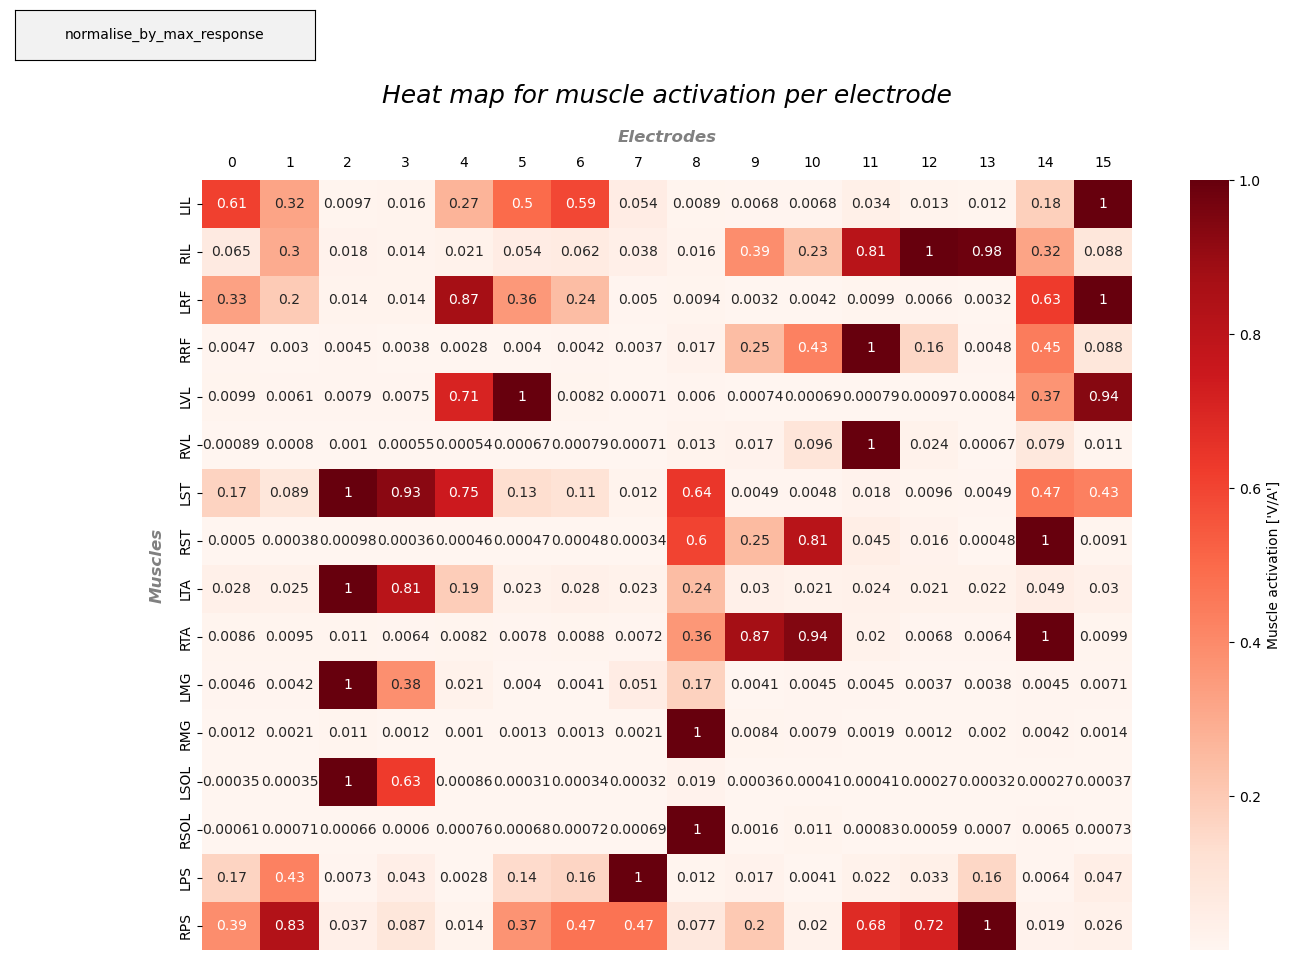

In [101]:
get_heatmap_all_muscles_overview(save_fig=1)

## Heat map indiviudal muscles, paddle lead arrangement

#### Heat map without interpolation

In [105]:
def get_heat_map_individual_msc_no_interpolation(save_fig=0, mt_muscles=mt_muscles, mt_electrodes=mt_electrodes):

    """
    A function to create a heatmap.

    Parameters
    ----------
    save_fig
        int, if set to 1 save figure, default set to 0 
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default

    """

    ## Define which normalisation method is used
    # data=set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # data_structure="normalise_max_P2P_div_amp"
    data=set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    data_structure="normalise_by_max_response"

    # Det the map image as an array so we can plot it 
    map_img = mpimg.imread('/Users/nealarohner/Desktop/Projectome_Finder/code/Refrences/lead_original.png')
    # Define paddle lead
    paddle_lead =np.zeros(80* 9).reshape((80,9))

    # Define annotation
    text = np.array([
    ['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','1', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '7','', '','', '', '', '13', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','0', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '6','', '','', '', '', '12', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','15', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''], ['', '5','', '','', '', '', '11', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','14', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '4','', '','', '', '', '10', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '3','', '2','', '8', '', '9', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', '']])


    for muscle_i in range(len(mt_muscles)):
        # creating subplot
        fig, ax = plt.subplots(figsize=(3,10)) 
    
        # Add values to the plot 
        numbers=[1, 0, 15, 14]
        for index, number in enumerate(numbers, start=0):   # default is zero
            n=(14*index)+3 # equal spacing
            row=4
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[7, 6, 5, 4]
        for index, number in enumerate(numbers, start=0):   # default is zero
            n=(14*index)+10 # equal spacing
            row=1
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[13, 12, 11, 10]
        for index, number in enumerate(numbers, start=0):   # default is zero
            n=(14*index)+10 # equal spacing
            row=7
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[3, 2, 8, 9]
        for index, number in enumerate(numbers, start=0):   # default is zero
            n=55+10
            row=1+(index*2)
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]        

        # Set title
        ax.set_title(f"Heat map for muscle {mt_muscles['muscle_name'][muscle_i]}", size=18, fontstyle='italic', pad=20)


        # drawing heatmap on current axes
        hmax= sns.heatmap(data=paddle_lead, annot=text, fmt="", cmap='Reds', cbar_kws={'label': "Muscle activation [V/A]"},
            yticklabels=False, xticklabels=False, vmin=0, vmax=1, 
            alpha = 0.75, # whole heatmap is translucent
            zorder = 2,
                )

        # Adjust image
        hmax.imshow(map_img,
            aspect = hmax.get_aspect(),
            extent =hmax.get_xlim() + hmax.get_ylim(),
            zorder = 1) #put the image under the heatmap


        ## Define Textbox
        axbox = fig.add_axes([-0.3, 1.0, 1., 0.05]) #[left, bottom, width, height]
        text_box = TextBox(axbox,label=None, textalignment="center")
        text_box.set_val(data_structure)  # Trigger `submit` with the initial string.

        # Save plots 
        if save_fig:
            folder_name= f"heatmap/muscles/no_interpolation/{data_structure}"
            data_file = mt_muscles['muscle_name'][muscle_i]+"_Heat_map_"+ data_structure+'.png'
            save_figure(folder_name, data_file)

        show()            
   

In [ ]:
get_heat_map_individual_msc_no_interpolation(save_fig=1)


#### Heat map with interpolation 


Which interpolatio approach should be used??
https://support.esri.com/en/technical-article/000005606
Since we have a continuous data: 
     where the location of the electrode  is the  hotspot (=point of highest stimulation), and the area around is stimulated aswell but at a certain decay of the hotspot

- linear interpolation is suited for continuos data and takes into account the 4 neighbouring cells
- cubic interpolation lead to smoother curves of the data (resp. colour changes) since it takes into account the 16 surrounding cells of a an output.

In [72]:
### Interpolate unknown values in the heat map ###

def interpolate_missing_pixels(image, mask, method, fill_value=0):

    """
    A function to interpolate missing values.
    
    Parameters
    ----------
    image 
        2D np.array
    mask
        a 2D boolean array, True indicates missing values
    method
        interpolation method, one of 'nearest', 'linear', 'cubic'.
    fill_value
        which value to use for filling up data outside the
        convex hull of known pixel values.
        Default is 0, Has no effect for 'nearest'.
        
    Return
    ----------
    interp_image
        nd.array with missing values interpolated
    """

    h, w = image.shape[:2]
    xx, yy = np.meshgrid(np.arange(w), np.arange(h))

    known_x = xx[~mask]
    known_y = yy[~mask]
    known_v = image[~mask]
    missing_x = xx[mask]
    missing_y = yy[mask]

    interp_values = interpolate.griddata(
        (known_x, known_y), known_v, (missing_x, missing_y),
        method=method, fill_value=fill_value
    )

    interp_image = image.copy()
    interp_image[missing_y, missing_x] = interp_values

    return interp_image


In [73]:
### text to define electrodes in plot
text = np.array([
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','1', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '7','', '','', '', '', '13', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','0', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '6','', '','', '', '', '12', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','15', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '5','', '','', '', '', '11', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','14', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '4','', '','', '', '', '10', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '3','', '2','', '8', '', '9', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', '']])

In [114]:
## Plot heat map with interpolated data ##
def get_heat_map_individual_msc_with_interpolation(save_fig=0, interpol_method='cubic', text=text, mt_muscles=mt_muscles, mt_electrodes=mt_electrodes):
    """
    A function to create a heatmap.

    Parameters
    ----------
    save_fig
        int, if set to 1 save figure
    interpol_method
        interpolation method, one of 'nearest', 'linear', 'cubic'
    text
        array used for annotation; to define electrodes in the plot
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default

    """

    ## Define which normalisation method is used
    # data=set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # data_structure="normalise_max_P2P_div_amp"
    
    data=set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    data_structure="normalise_by_max_response"

    # Since it would round values between 0 and 1 to 0, we multiply data by 100
    data=[data_points*100 for data_points in data]

    ## Build tensor filled with -1, thus undefined values are easily recognisable ##
    paddle_lead =np.zeros(80* 9)
    paddle_lead=np.array([-1]*len(paddle_lead))
    paddle_lead=paddle_lead.reshape((80,9))

    ## Get the lead image as an array so we can plot it ##
    map_img = mpimg.imread('/Users/nealarohner/Desktop/Projectome_Finder/code/Refrences/lead_original.png') 

    ## For every muscle fill tensor with values ##
    for muscle_i in range(len(mt_muscles)):
        
        # Set settings for plot ## 
        fig, ax = plt.subplots(figsize=(3,10))# creating subplot
        ax.set_title(f"{interpol_method} interpolated heat map for muscle {mt_muscles['muscle_name'][muscle_i]}", size=18, fontstyle='italic', pad=20)# set title

        # Define electrode placements
        numbers=[1, 0, 15, 14]
        for index, number in enumerate(numbers, start=0): 
            n=(14*index)+3 # equal spacing
            row=4
            e=number
            #save the same value for all the pixels in the electrode
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]
                    # print(i+n)

        numbers=[7, 6, 5, 4]
        for index, number in enumerate(numbers, start=0):  
            n=(14*index)+10 # equal spacing
            row=1
            e=number
            #save values to the indeces
            for i in range(6):
            
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[13, 12, 11, 10]
        for index, number in enumerate(numbers, start=0):   
            n=(14*index)+10 # equal spacing
            row=7
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[3, 2, 8, 9]
        for index, number in enumerate(numbers, start=0):  
            n=55+10
            row=1+(index*2)
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e] 
        
        # Create boolean, with true for the unknown values, which were set to -1, for interpolation #
        mask=paddle_lead<0

        ## Get interpolation for the unknown values ##
        interpolated_image=interpolate_missing_pixels(
        image=paddle_lead,
        mask=mask,
        method=interpol_method,
        fill_value= 0
        )

        ## Set values outside of lead to zero ##
        # do it after interpolation that this doent get taken into account for interpol
        nr_columns=[8, 4, 2, 1, 1, 1, 2, 4, 8]
        for index, columns in enumerate(nr_columns):
            for col in range(0, columns):
                    interpolated_image[col][0+index] =0

        nr_columns=[7, 5,4, 4, 4, 4,4, 5, 7]
        for index, columns in enumerate(nr_columns):
            for col in range(79, 79-columns, -1):
                    interpolated_image[col][0+index] =0


        ## Drawing heatmap on current axes ##
        # norm = mcolors.TwoSlopeNorm(vmin=interpolated_image.min(),vcenter=0, vmax = interpolated_image.max())
        hmax= sns.heatmap(data=interpolated_image, annot=text, fmt="",
            cmap=LinearSegmentedColormap.from_list('', ['white', 'r']),
            # cmap=plt.cm.RdBu, 
            # norm=norm,
            cbar_kws={'label': "Muscle activation [V/A]"},
            yticklabels=False, xticklabels=False, vmin=0, vmax=100, 
            alpha = 0.75, # whole heatmap is translucent
            zorder = 2,
                )
        hmax.imshow(map_img,
            aspect = hmax.get_aspect(),
            extent =hmax.get_xlim() + hmax.get_ylim(),
            zorder = 1) #put the image under the heatmap


        ## Define Textbox
        axbox = fig.add_axes([-0.5, 1.0, 1., 0.05]) #[left, bottom, width, height]
        text_box = TextBox(axbox,label=None, textalignment="center")
        text_box.set_val(data_structure)  # Trigger `submit` with the initial string.

        ## Save plots 
        if save_fig:
            folder_name= f"heatmap/muscles/interpolation/{data_structure}"
            data_file = mt_muscles['muscle_name'][muscle_i]+"_"+"heat_map"+'.png'
            save_figure(folder_name, data_file)
        show() 

normalisation method is: normalise_max_response


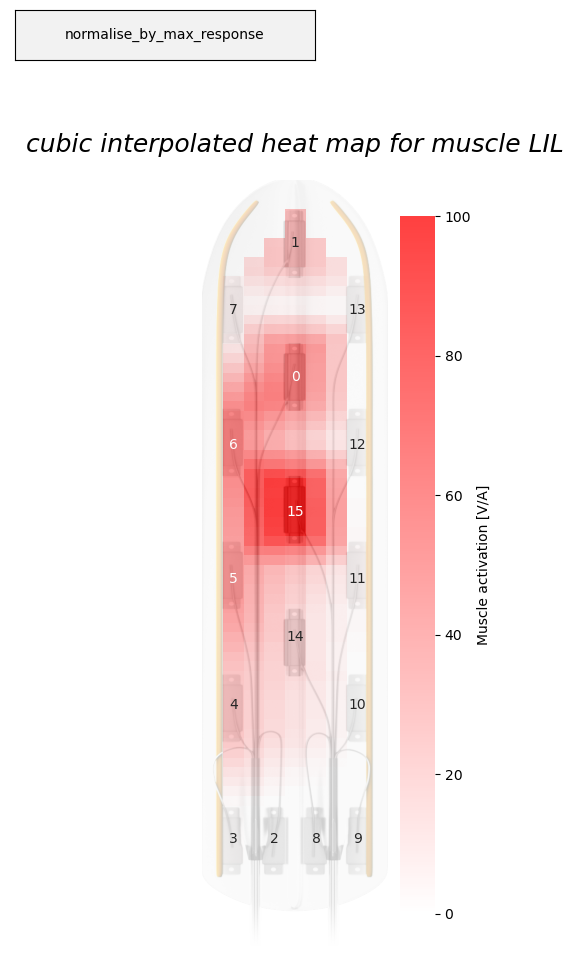

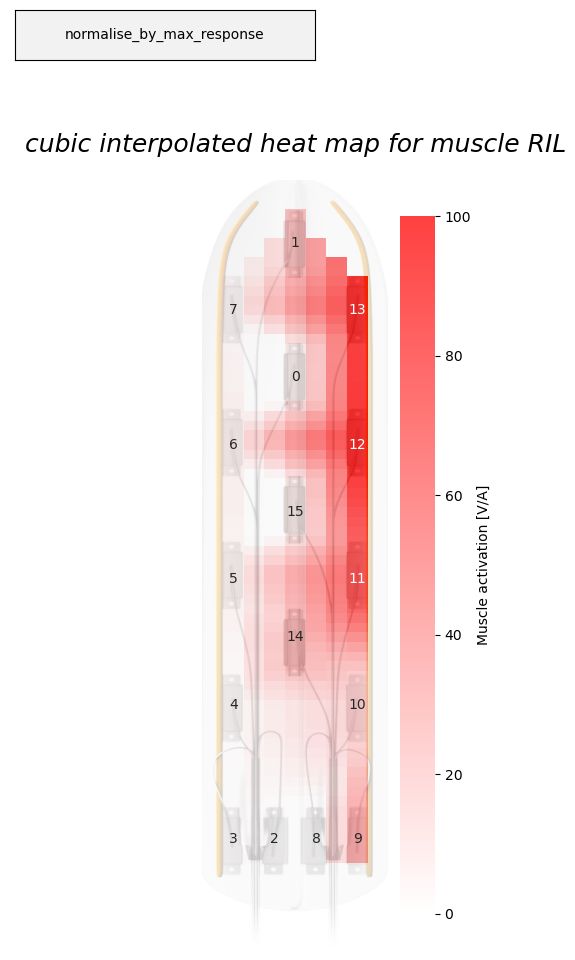

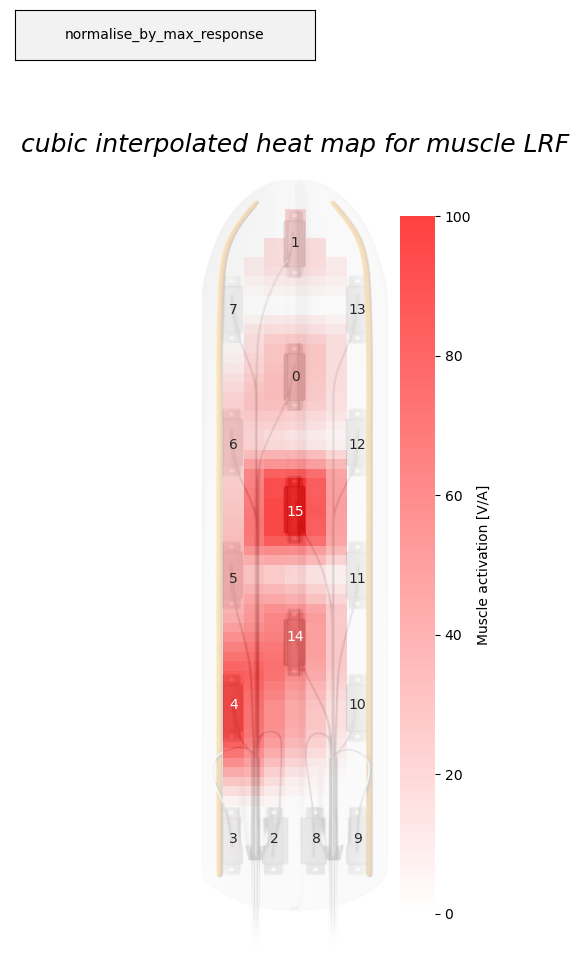

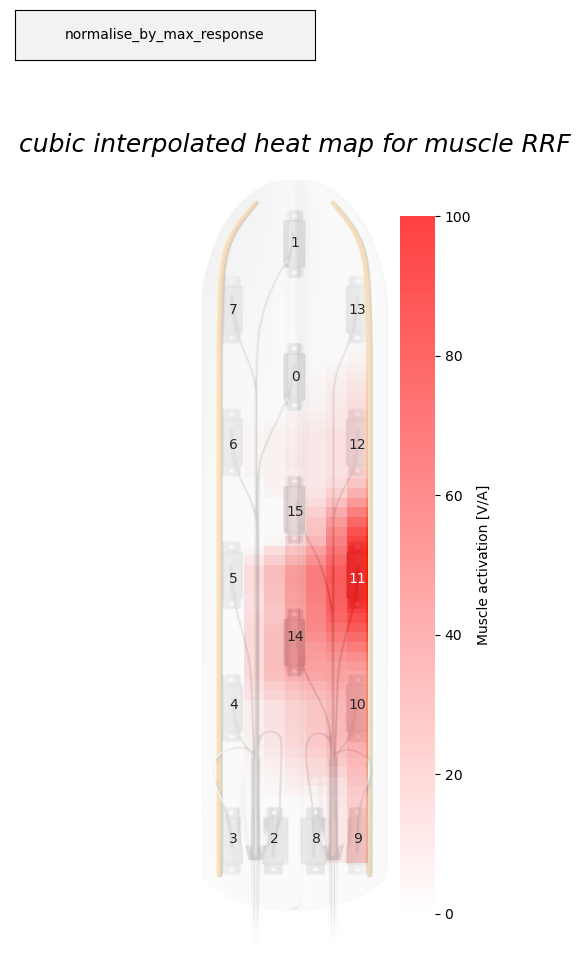

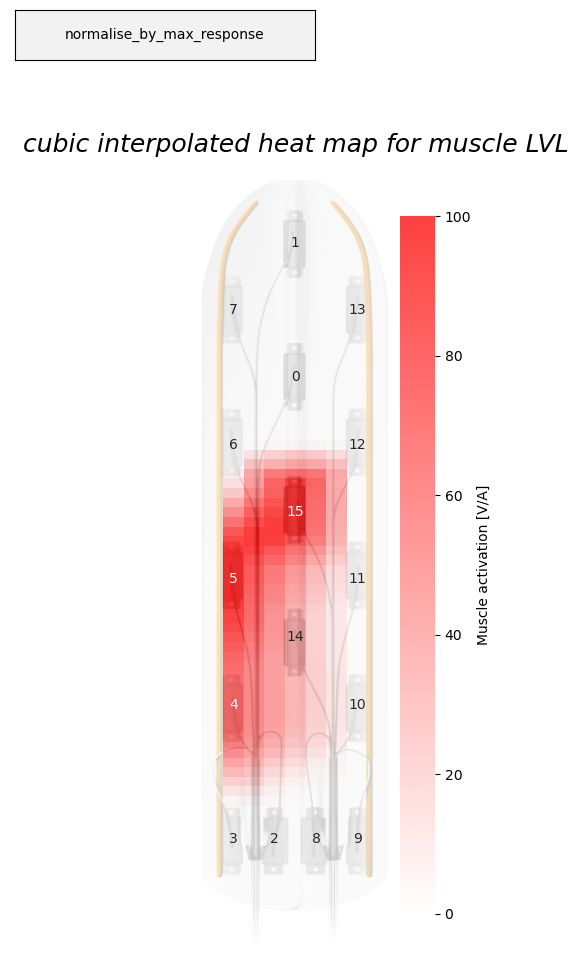

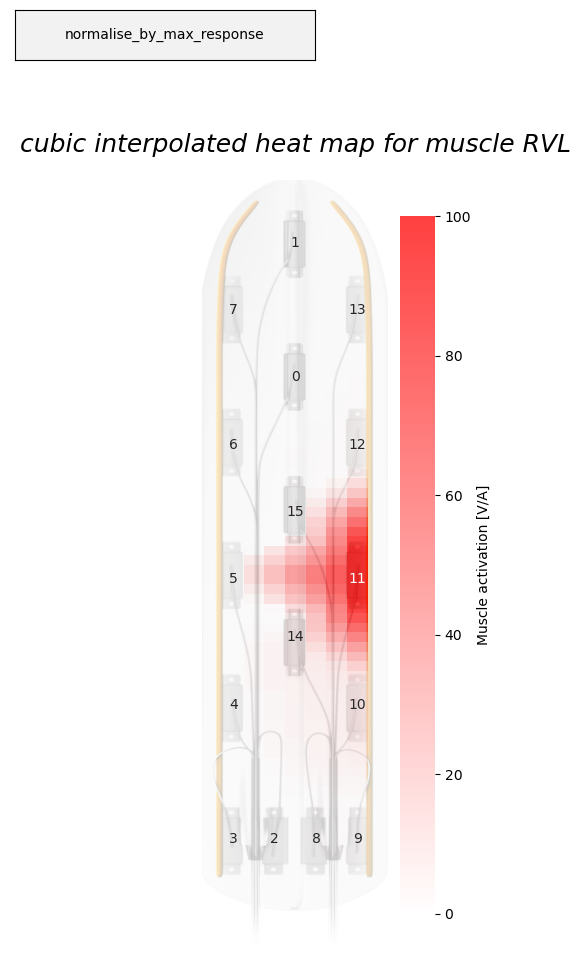

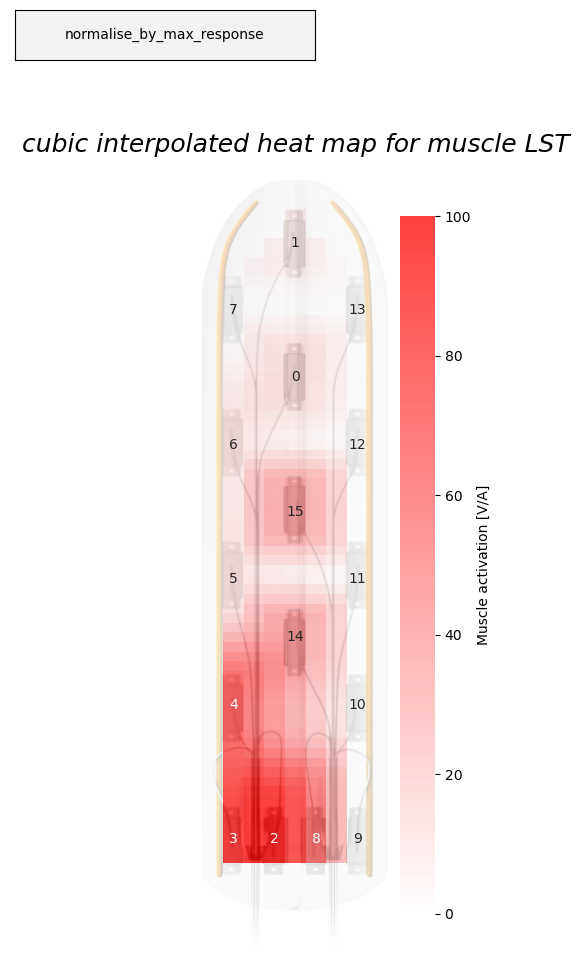

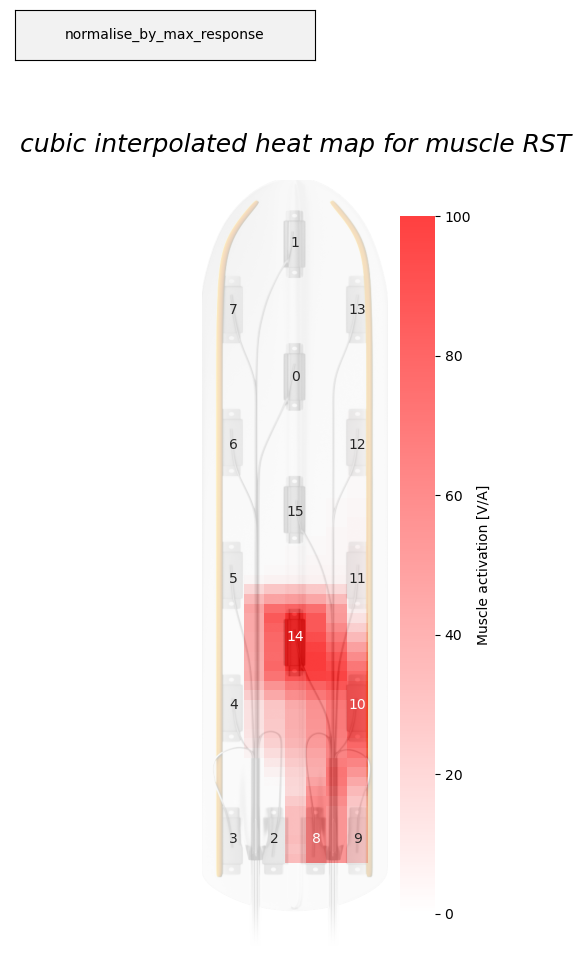

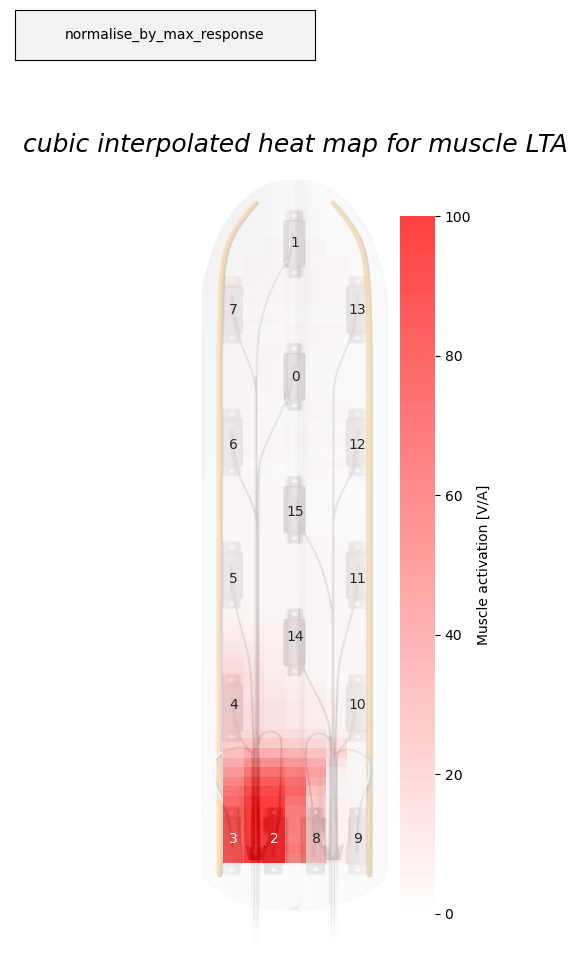

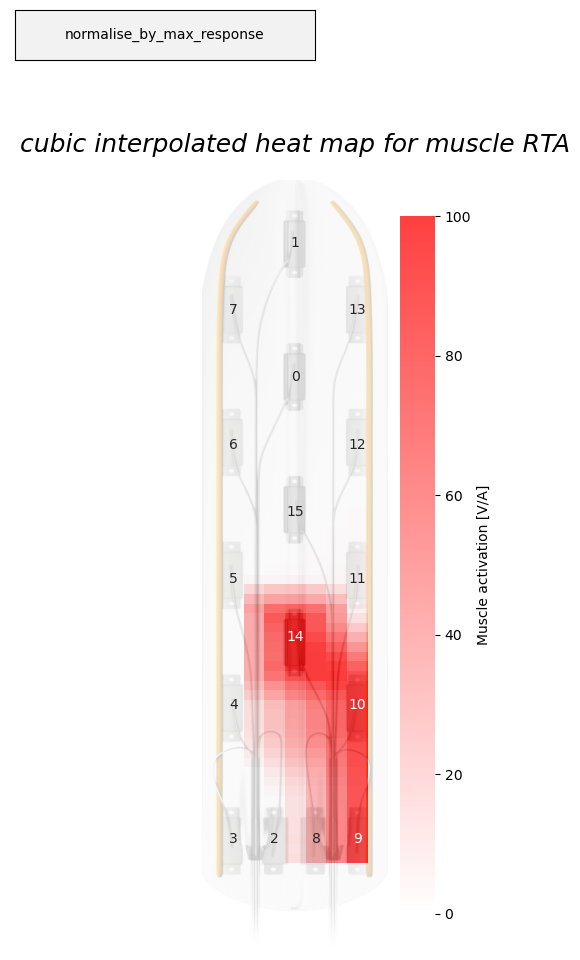

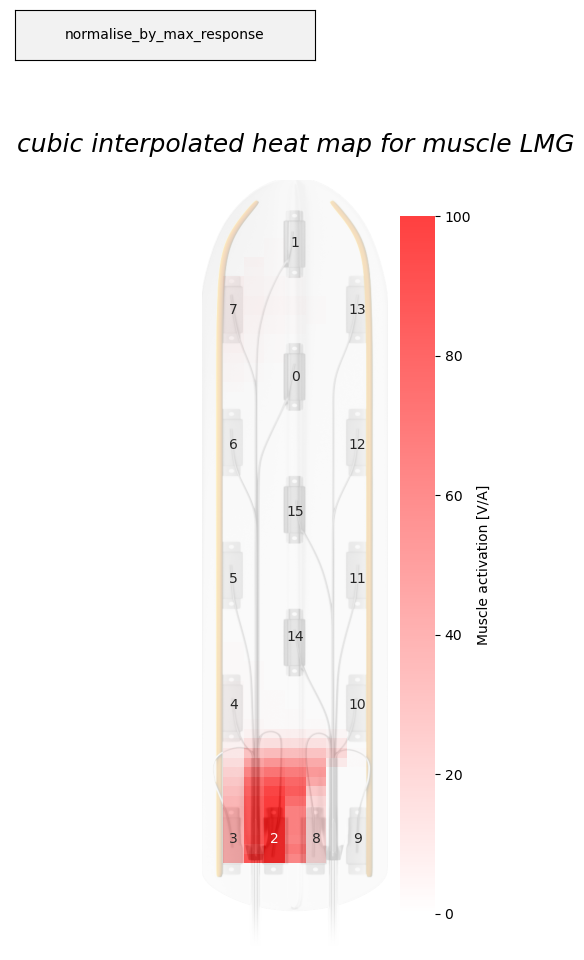

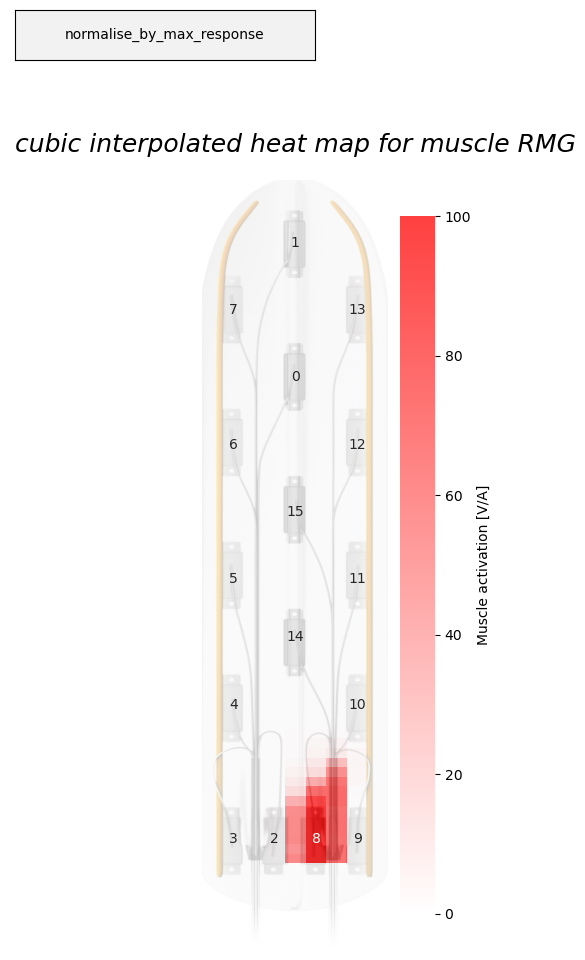

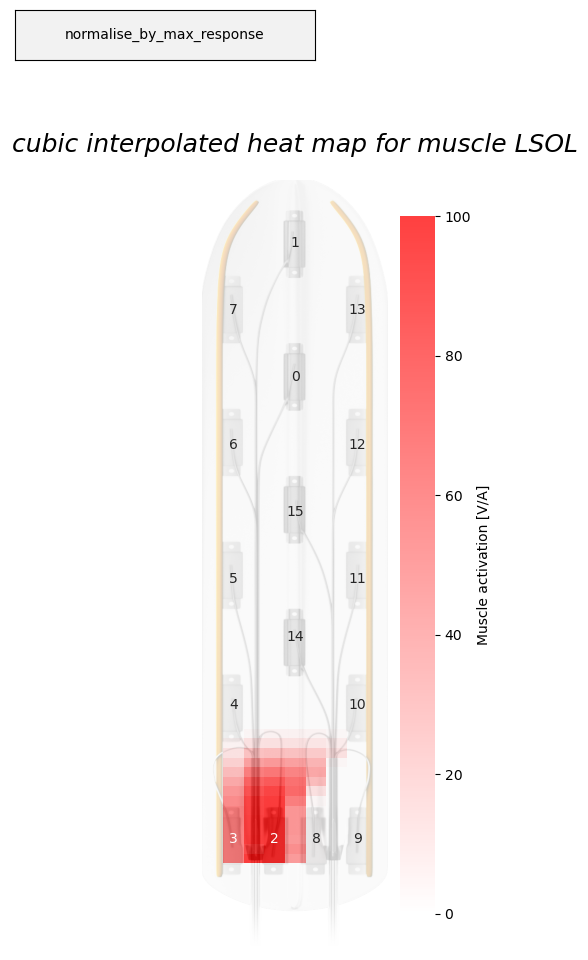

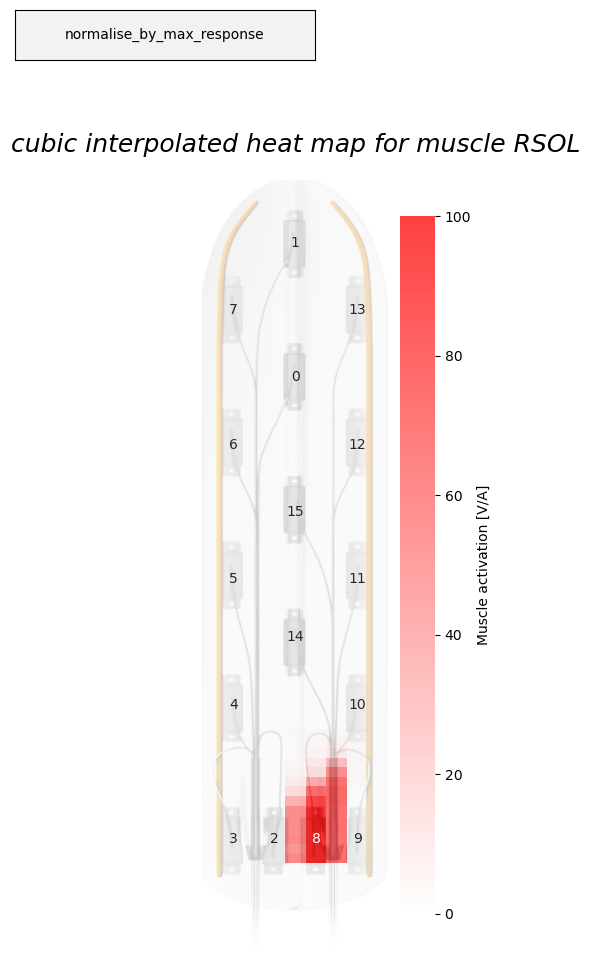

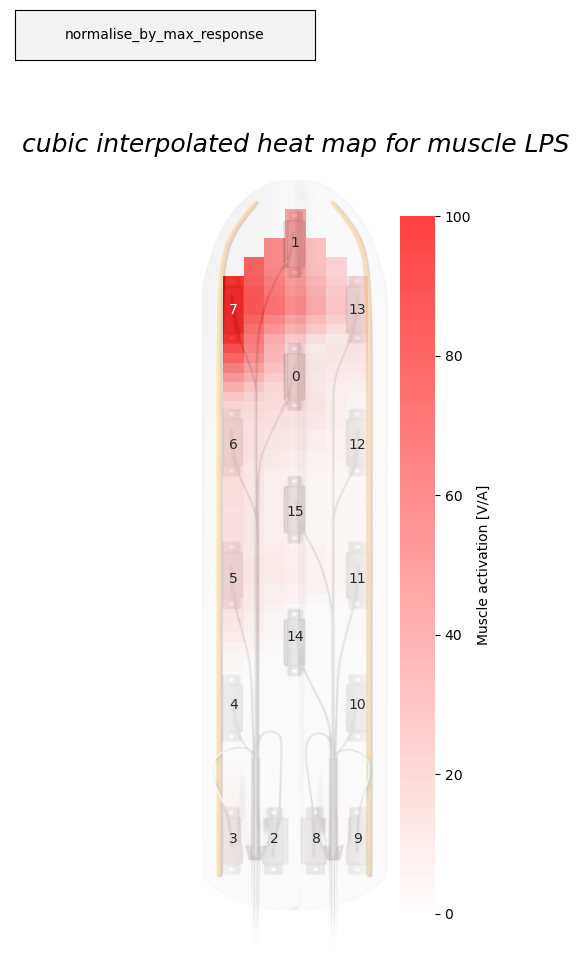

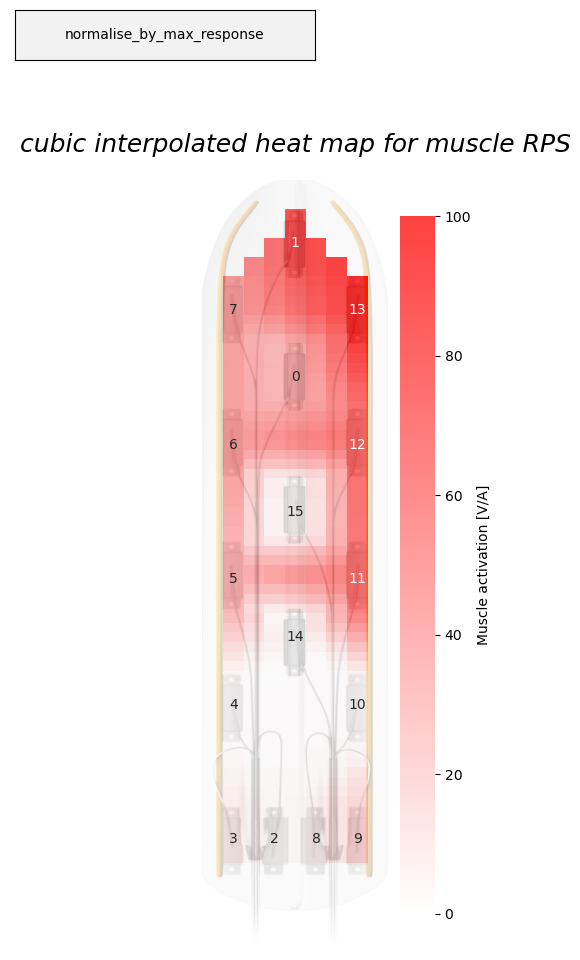

In [116]:
get_heat_map_individual_msc_with_interpolation(save_fig=1)

# B: Fit recruitment to sigmoids

A possible plan could then be to take a look at the parameters of sigmoid after the fit (and the goodness of the fit) and use go from those to describe the data.
Then comparing these to the ones obtained with the simulations.

Version, assuming max value is max data value

In [ ]:

def sigmoid(x, L ,x0, k, b):
    """
    A function to define a sigmoid curve.

    Parameters
    ----------
    L 
        is the limes
    x0 
        is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 
    k 
        the slope; is responsible for scaling the input, which remains in (-inf,inf)
    b 
        adds bias 
     """


    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

In [ ]:
## Sergio version all muscles 
from matplotlib import pylab
from pylab import *
from scipy.optimize import curve_fit

# blabla

In [ ]:


def fit_sigmoid_max_value_given(data=peak2peak_data_to_tensor, save_fig=0,unique_amplitudes=unique_amplitudes, mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
    """
    A function to fit a sigmoid curve to given data.

    Parameters
    ----------
    data
        ..
    save_fig
        int, if set to 1 save figure, default set to 0 
    unique_amplitudes
        ...
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default    
    Output
    ----------
    pcov 
        is the error of a parameter in the model, Does the changing of the parameter slightly give a better fit? 
        if pcov is very big, (=bad) , changing of the parameter doesnt have big of a influence, this we dont really know what is the (optimal) parameter 
    popt 
        is the optimal parameters for the function
     """

    ## variables for plot
    colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
    label=mt_muscles["muscle_name"]
   
    for elec_i in mt_electrodes["elec_name"]:
        
        #exclude the muscles with max activation <0.05
        muscle_over_0_05 =[]
        for muscle_i in range (0, len(mt_muscles)):
            if np.nanmax(np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]))>0.05:
                muscle_over_0_05.append(muscle_i)

        # creating subplot
        fig, ax = plt.subplots(figsize=(10,7))
        # for muscle_i in range (0, len(mt_muscles)):
        for muscle_i in (muscle_over_0_05):
        

            ## Get rid of nan values
            peak_peak_values=np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]) # turn tensor into array
            mask = ~np.isnan(peak_peak_values) # search for posistions of nan values
            ydata=peak_peak_values[mask] # set y without nan values
            
            #multiply amplitdes by 10 , seems like it can interpret the values better
            xdata = np.array(unique_amplitudes["amplitudes"][mask])# set x for y
            xdata = xdata*10

            ##just to try add a zero to beginning of x data and y data for better fit?
            # xdata=np.append(0,xdata)
            # ydata=np.append(0, ydata)

            ## Initial guess for the parameters ##
            ## Get optimal parameters for sigmoid curve
            p0 =[L=max(ydata) ,x0=np.median(xdata), k=0.5, b=min(ydata)]

            ## to avoid RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.
            ##smoothen data if needed
            try:
                popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox',
                # bounds=(0,L)
                maxfev=10000
                )
                # print(f"opt:{popt}")
                # print(f"pcov:{pcov}")
            except:
                print("############################################################")
                print("OK, avoid RuntimeError")
                ## smoothen the data by convoluting it with a rectangle 
                # seems to look smoother, but is this feasible with so few data points?
                filt= np.ones(3)/3 # setting window to three points
                ydata_smooth= np.convolve(ydata, filt, mode="valid")
                ydata=ydata_smooth
                xdata=xdata[1:-1] # change borders, since we need space for the window
                

            ## define x and y for sigmoidal curve
            #interpolation should start before data and end a little after ( to see asymptote)
            if max(xdata)>44:
                last_x_value=49
            else:
                last_x_value=max(xdata)+5
            x=np.linspace(0, last_x_value, 70) #take a lot of steps for smoother curve, and doens't seem to have effect on pcov
            y = sigmoid(x, *popt)

            ###################
            ## PLOT SETTINGS ##
            ###################

            ax.plot(xdata, ydata, 'o', c=colors[muscle_i])
            ax.plot(x,y,  label=mt_muscles['muscle_name'][muscle_i], c=colors[muscle_i])

            # Add text descripiton to the points for visibility
            ax.text(x[-1], y[-1], label[muscle_i],c=colors[muscle_i], size=10) 

            ## set ticks
            ax.set_xticks(ticks=np.arange(0, 55,5), labels=np.linspace(0, 5,11)) # since amplitudes are multiplied by 10, customise the xlable
            ax.set_yticks(ticks=np.linspace(0, 1.,11))

            ## set titles
            ax.set_xlabel("Amplitude [10^-4 A]")
            ax.set_ylabel("Peak to peak value [mV]")
            plt.legend(title="muscles")
            plt.title(f"Fitting data to sigmoid for electrode: {elec_i} ")
            
            ## save plots ##
            if save_fig:
                data_file = "elec"+"_"+str(elec_i)+"_"+"sigmoid_fit"+'.png'
                folder_name="sigmoidal_fit/muscles"
                save_figure(folder_name, data_file)


        plt.show()


In [ ]:
## SErgio version all muscles , MAIN,for all elecs, working:D, amps multiplied by 10, seems to interpret the values better
from matplotlib import pylab
from pylab import *


from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# L is the limes 
# b adds bias, set to zero?
# k is responsible for scaling the input, how steep the curve, has to be >0
# x0, x value in the middle of the Sigmoid

# def fit_sigmoid_max_value_given(data=peak_peak_values, unique_amplitudes=unique_amplitudes, mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
# pcov is the error of a parameter in the model, Does the changing of the parameter slightly give a better fit? 
    #if pcov is very big, (=bad) , changing of the parameter doesnt have big of a influence, this we dont really know what is the (optimal) parameter 
# popt is the optimal parameters for the function

colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
label=mt_muscles["muscle_name"]
elec_i=2
save_fig=0

for elec_i in mt_electrodes["elec_name"]:
    
    #exclude the muscles with max activation <0.05
    muscle_over_0_05 =[]
    for muscle_i in range (0, len(mt_muscles)):
        if np.nanmax(np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]))>0.05:
            muscle_over_0_05.append(muscle_i)

    # creating subplot
    fig, ax = plt.subplots(figsize=(10,7))
    # for muscle_i in range (0, len(mt_muscles)):
    for muscle_i in (muscle_over_0_05):
    

        ## Get rid of nan values
        peak_peak_values=np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]) # turn tensor into array
        mask = ~np.isnan(peak_peak_values) # search for posistions of nan values
        ydata=peak_peak_values[mask] # set y without nan values
        
        #multiply amplitdes by 10 , seems like it can interpret the values better
        xdata = np.array(unique_amplitudes["amplitudes"][mask])# set x for y
        xdata = xdata*10

        ##just to try add a zero to beginning of x data and y data for better fit?
        # xdata=np.append(0,xdata)
        # ydata=np.append(0, ydata)

       

        ## Initial guess for the parameters ##
        # The maximum asymptotic intensity. 
        L= max(ydata)
        #midpoint # The time point at which the sigmoidal curve reaches half of its maximum intensity.
        x0= np.median(xdata)
        #calculate the slope:  
        k=0.5
        # b, adds bias, take the lowest value of y data
        b=min(ydata)

        ## Get optimal parameters for sigmoid curve
        p0 =[L ,x0, k, b]



        ## to avoid RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.
        ##smoothen data if needed
        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox',
            # bounds=(0,L)
            maxfev=10000
            )
            # print(f"opt:{popt}")
            # print(f"pcov:{pcov}")
        except:
            print("############################################################")
            print("OK, avoid RuntimeError")
            ## smoothen the data by convoluting it with a rectangle 
            # seems to look smoother, but is this feasible with so few data points?
            filt= np.ones(3)/3 # setting window to three points
            ydata_smooth= np.convolve(ydata, filt, mode="valid")
            ydata=ydata_smooth
            xdata=xdata[1:-1] # change borders, since we need space for the window
            

        ## define x and y for sigmoidal curve
        #interpolation should start before data and end a little after ( to see asymptote)
        if max(xdata)>44:
            last_x_value=49
        else:
            last_x_value=max(xdata)+5

        x=np.linspace(0, last_x_value, 70) #take a lot of steps for smoother curve, and doens't seem to have effect on pcov


        y = sigmoid(x, *popt)

        ax.plot(xdata, ydata, 'o', c=colors[muscle_i])
        ax.plot(x,y,  label=mt_muscles['muscle_name'][muscle_i], c=colors[muscle_i])

        # Add text descripiton to the points for visibility
        ax.text(x[-1], y[-1], label[muscle_i],c=colors[muscle_i], size=10) 
        # ax.text(xdata[-1], ydata[-1], label[muscle_i],c=colors[muscle_i], size=10)      

        
        ## set ticks
        ax.set_xticks(ticks=np.arange(0, 55,5), labels=np.linspace(0, 5,11)) # since amplitudes are multiplied by 10, customise the xlable
        ax.set_yticks(ticks=np.linspace(0, 1.,11))

        ax.set_xlabel("Amplitude [10^-4 A]")
        ax.set_ylabel("Peak to peak value [mV]")
        plt.legend(title="muscles")
        plt.title(f"Fitting data to sigmoid for electrode: {elec_i} ")
        
        ## save plots ##
        if save_fig:
            data_file = "elec"+"_"+str(elec_i)+"_"+"sigmoid_fit"+'.png'
            folder_name="sigmoidal_fit/muscles"
            save_figure(folder_name, data_file)


    plt.show()


# fit with normal amps

find literature, why I can multiply by 10

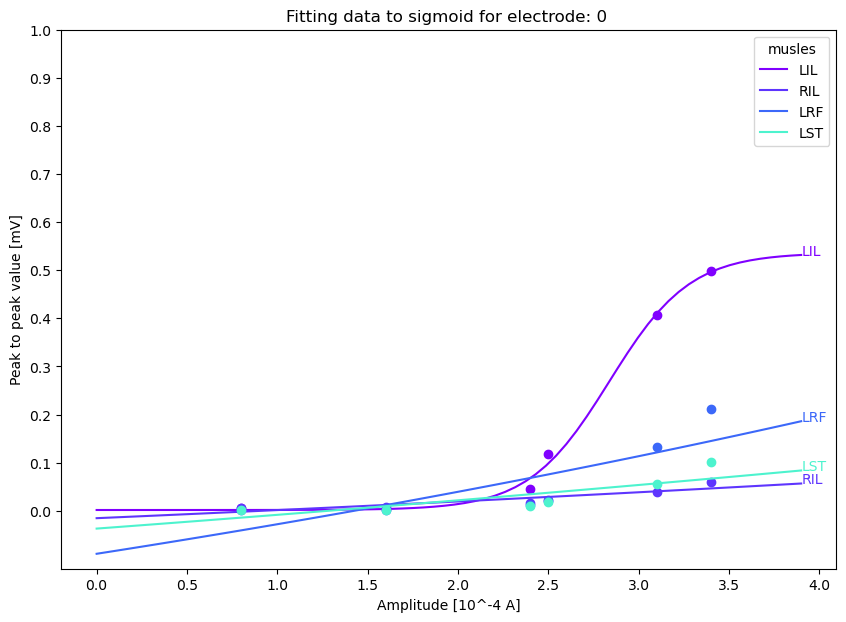

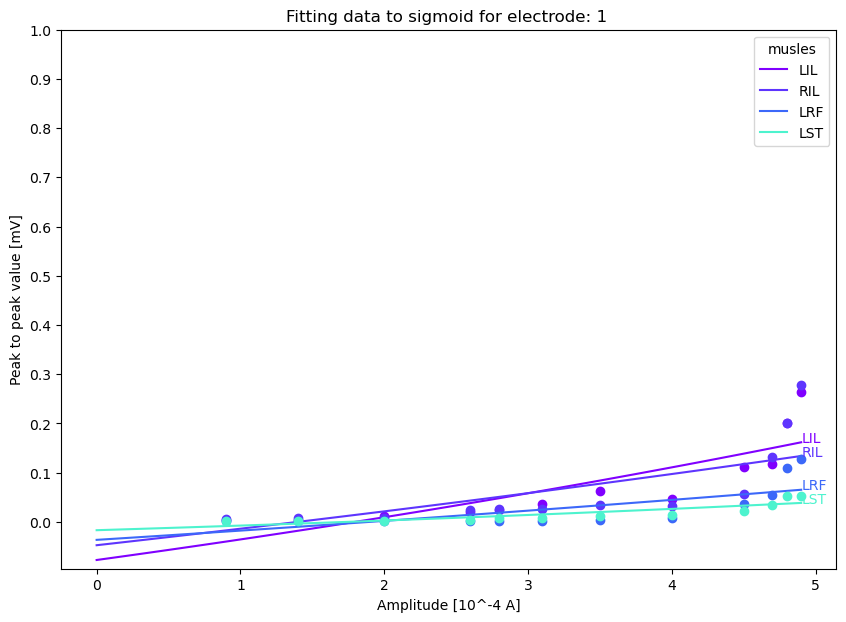

############################################################
OK, so it went wrong.


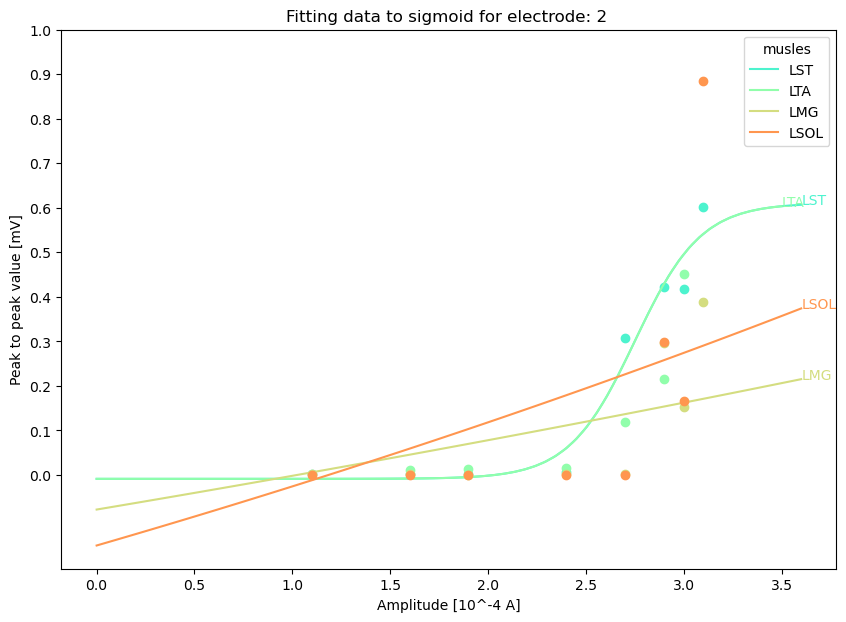

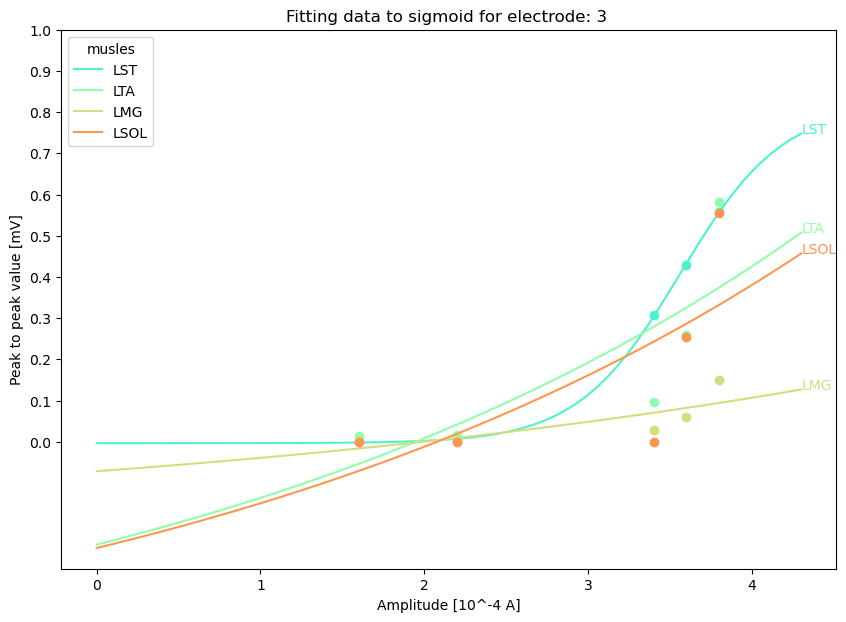

/Users/nealarohner/opt/anaconda3/envs/projectome_finder/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


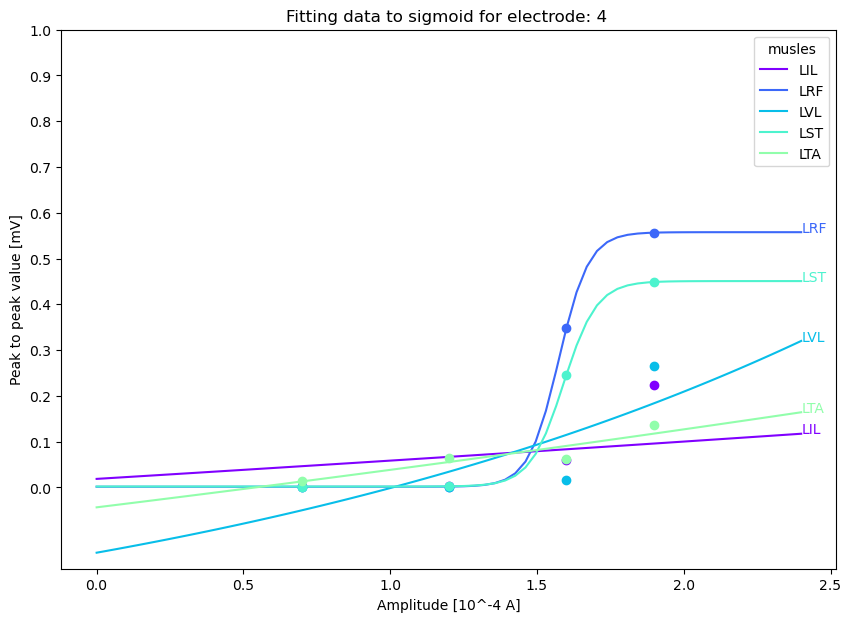

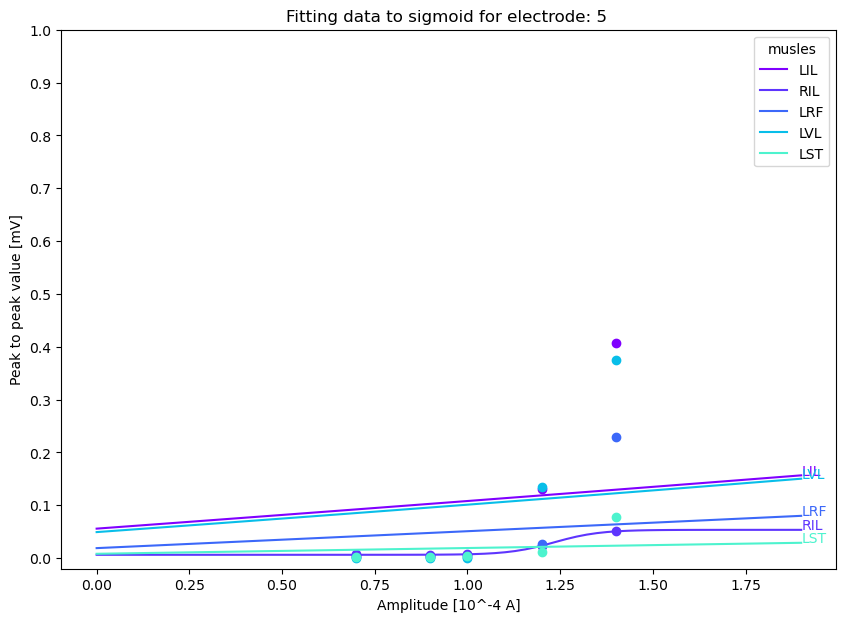

############################################################
OK, so it went wrong.
############################################################
OK, so it went wrong.


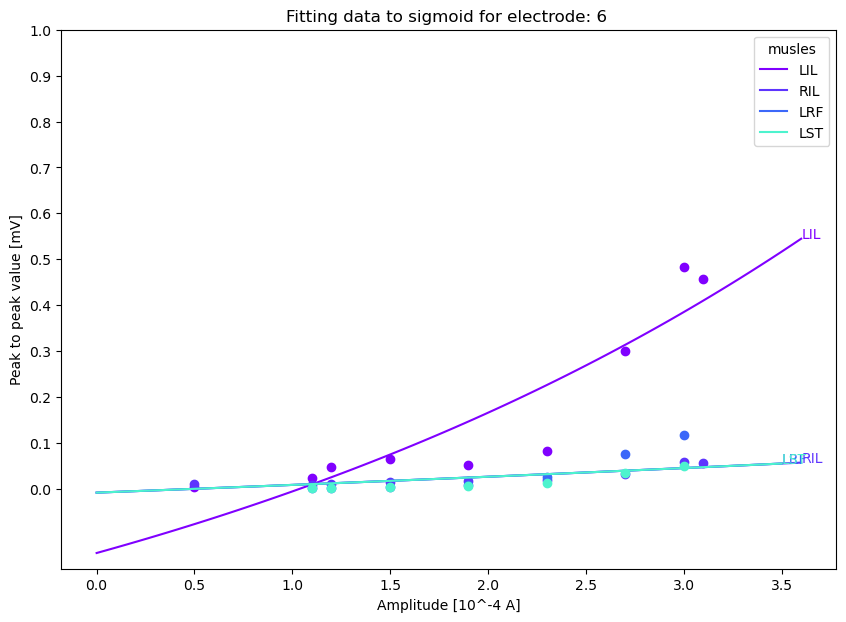

############################################################
OK, so it went wrong.


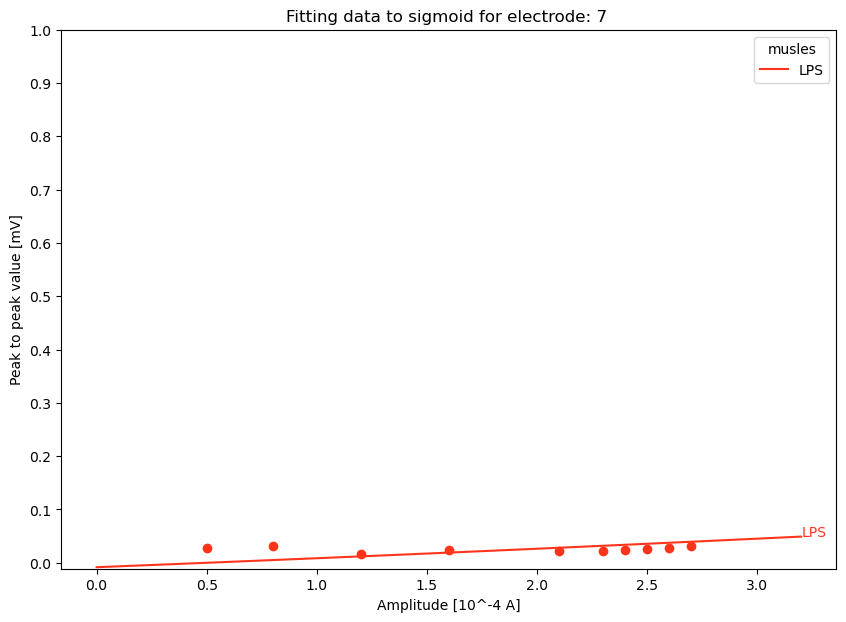

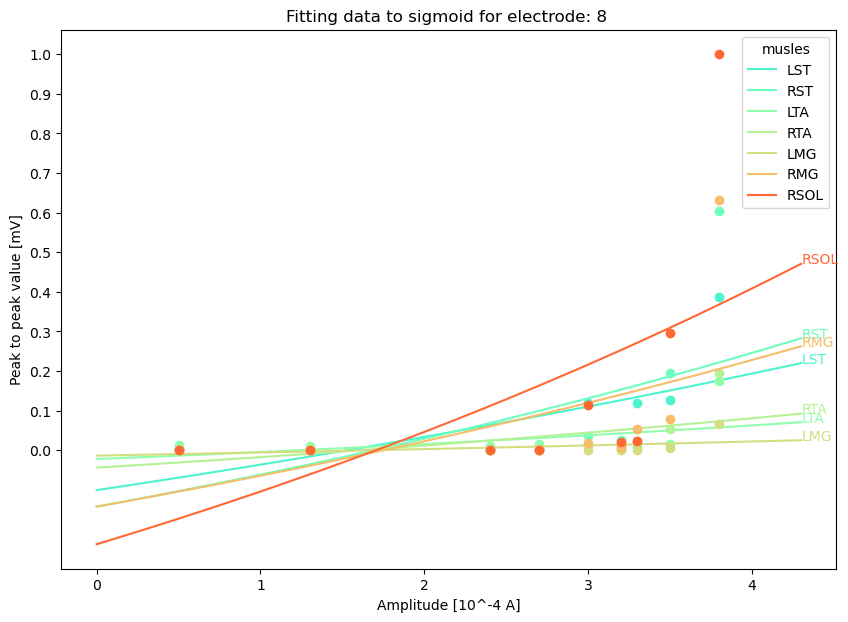

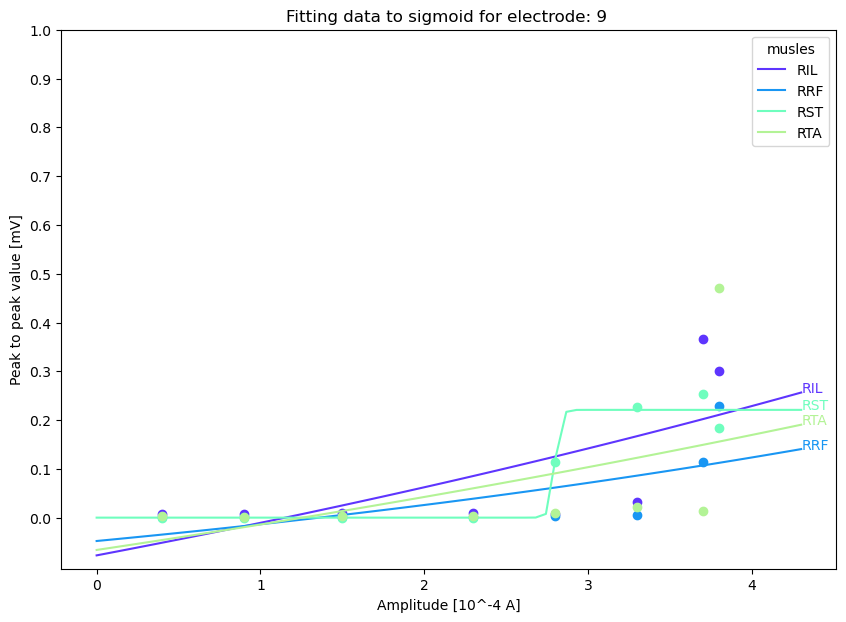

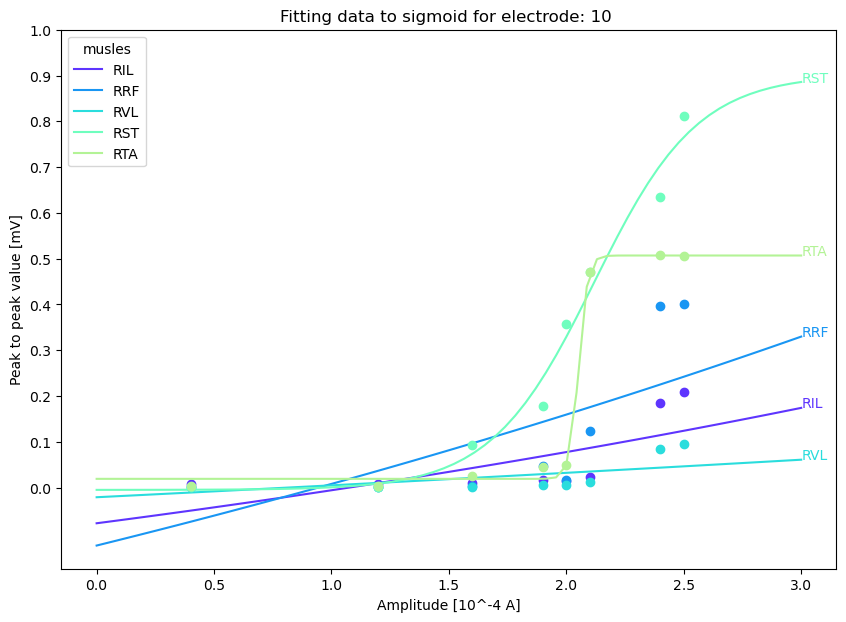

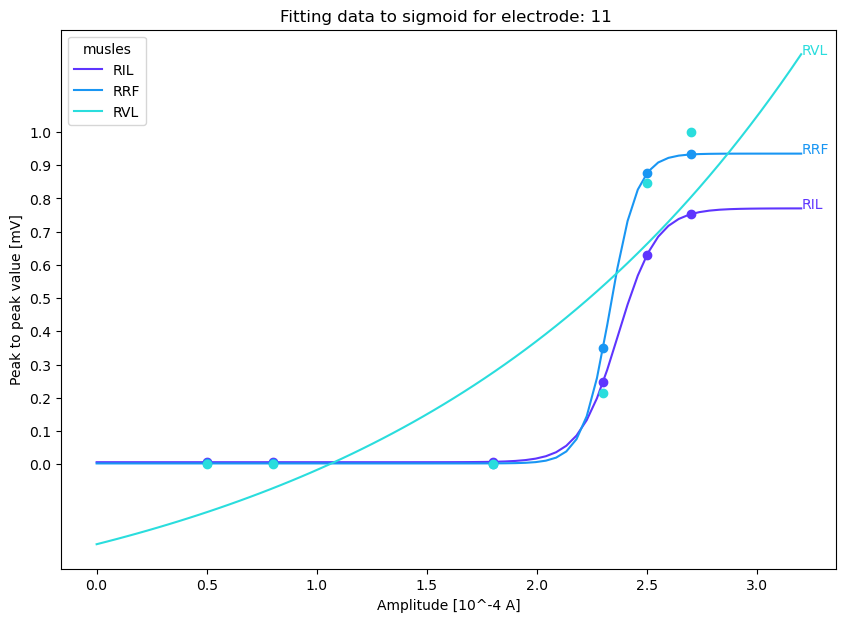

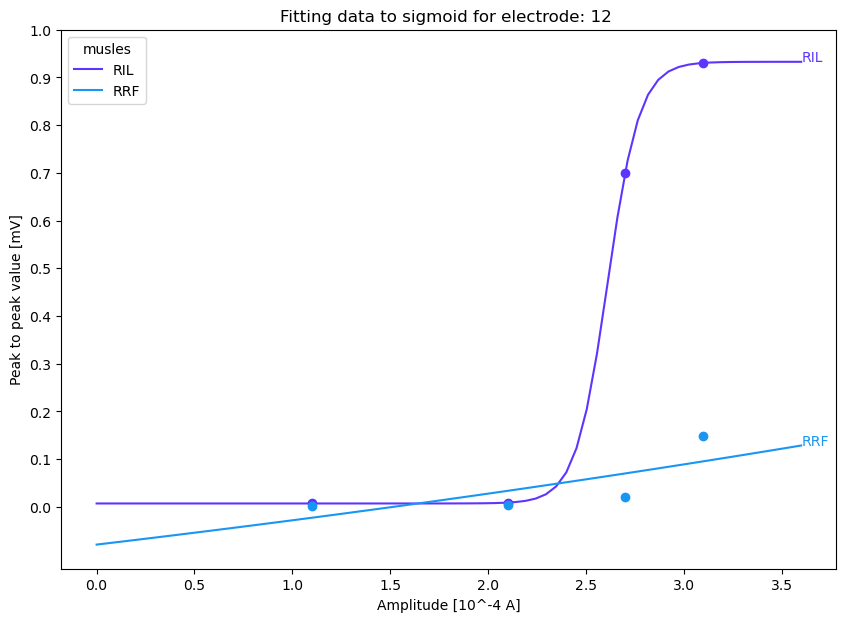

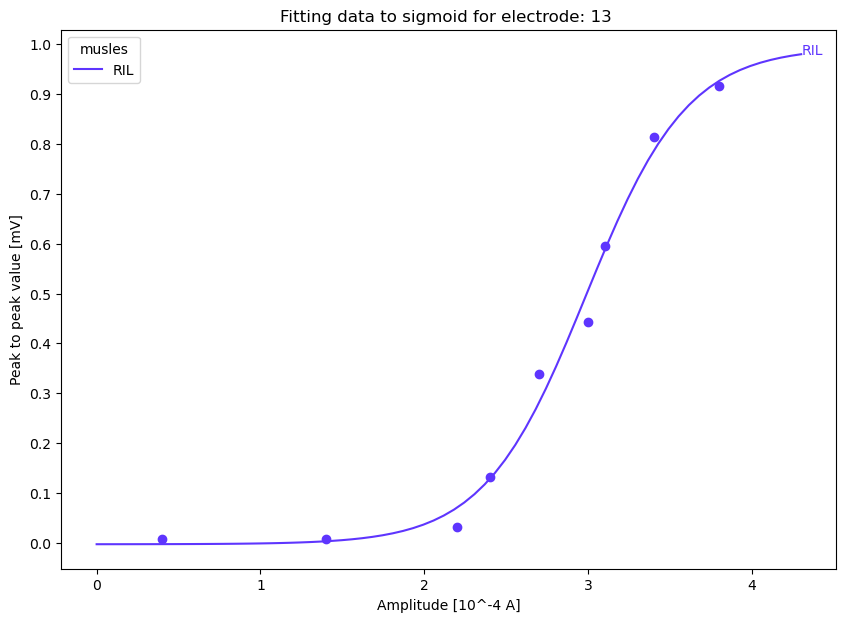

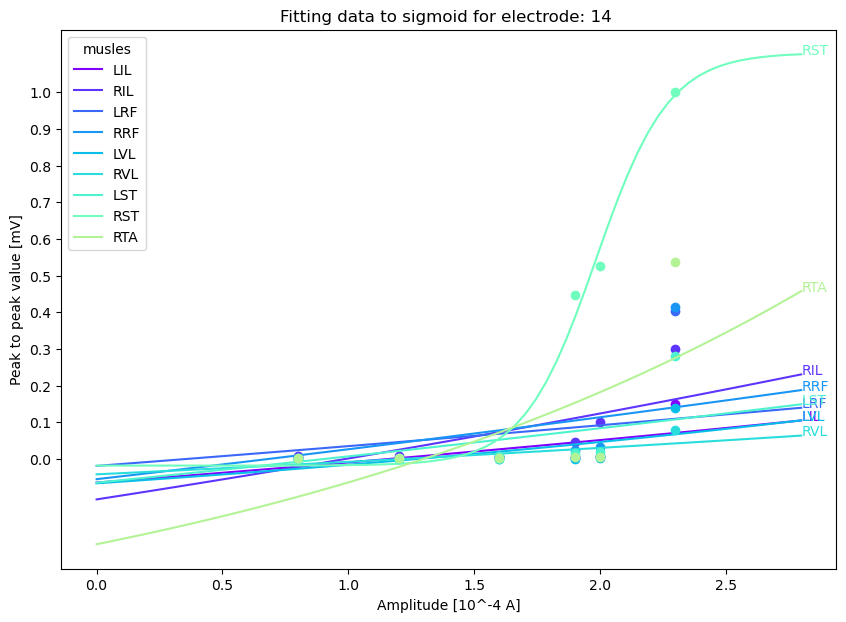

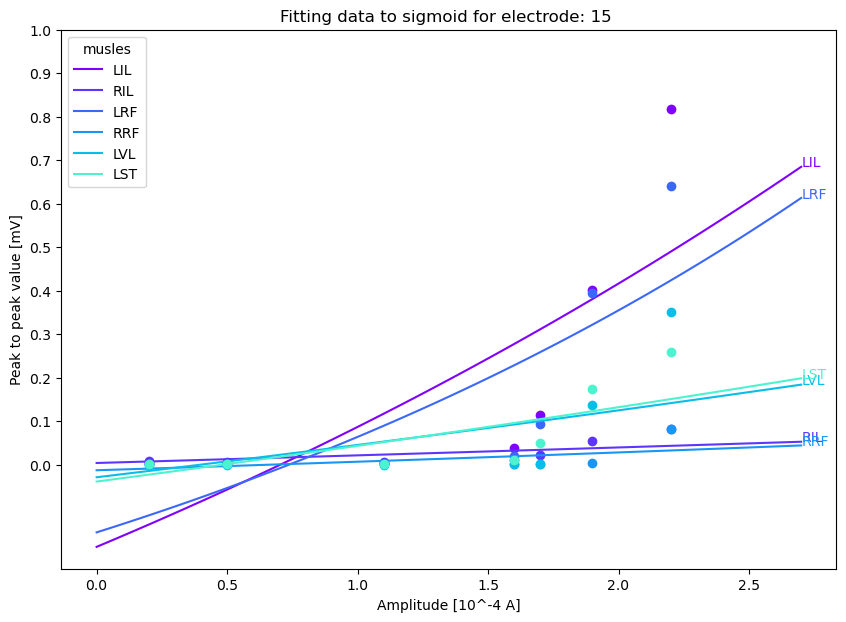

In [510]:
## SErgio version all muscles , for all elecs, working:D, amps normal
from matplotlib import pylab
from pylab import *


from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# L is the limes 
# b adds bias, set to zero?
# k is responsible for scaling the input, how steep the curve, has to be >0
# x0, x value in the middle of the Sigmoid

# def fit_sigmoid_max_value_given(data=peak_peak_values, unique_amplitudes=unique_amplitudes, mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
# pcov is the error of a parameter in the model, Does the changing of the parameter slightly give a better fit? 
    #if pcov is very big, (=bad) , changing of the parameter doesnt have big of a influence, this we dont really know what is the (optimal) parameter 
# popt is the optimal parameters for the function

colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
label=mt_muscles["muscle_name"]
elec_i=2
save_fig=0

for elec_i in mt_electrodes["elec_name"]:
    
    #exclude the muscles with max activation <0.05
    muscle_over_0_05 =[]
    for muscle_i in range (0, len(mt_muscles)):
        if np.nanmax(np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]))>0.05:
            muscle_over_0_05.append(muscle_i)

    # creating subplot
    fig, ax = plt.subplots(figsize=(10,7))
    # for muscle_i in range (0, len(mt_muscles)):
    for muscle_i in (muscle_over_0_05):
    

        ## Get rid of nan values
        peak_peak_values=np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]) # turn tensor into array
        mask = ~np.isnan(peak_peak_values) # search for posistions of nan values
        ydata=peak_peak_values[mask] # set y without nan values
        #multiply amplitdes by 10 ,to make sure they are
        xdata = np.array(unique_amplitudes["amplitudes"][mask])# set x for y
        # xdata = xdata*10

        ##just to try add a zero to beginning of x data and y data for better fit?
        # xdata=np.append(0,xdata)
        # ydata=np.append(0, ydata)

       

        ## Initial guess for the parameters ##
        # The maximum asymptotic intensity. 
        L= max(ydata)
        #midpoint # The time point at which the sigmoidal curve reaches half of its maximum intensity.
        x0= np.median(xdata)
        #calculate the slope:  
        k=0.5
        # b, adds bias, take the lowest value of y data
        b=min(ydata)

        ## Get optimal parameters for sigmoid curve
        p0 =[L ,x0, k, b]





        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox',
            # bounds=(0,L)
            maxfev=10000
            )
            # print(f"opt:{popt}")
            # print(f"pcov:{pcov}")
        except:
            print("############################################################")
            print("OK, so it went wrong.")
            ## smoothen the data by convoluting it with a rectangle 
            # seems to look smoother, but is this feasible with so few data points?
            filt= np.ones(3)/3 # setting window to three points
            ydata_smooth= np.convolve(ydata, filt, mode="valid")
            ydata=ydata_smooth
            xdata=xdata[1:-1] # change borders, since we need space for the window
            

        ## define x and y for sigmoidal curve
        # x=np.linspace(0, 50, 60) # interpolation should start before data and end a little after ( to see asymptote), and in steps of 0.1 
        # x=np.linspace(min(xdata), max(xdata)+5, len(xdata)+1)
        # x=np.linspace(min(xdata), max(xdata)+5, 50) #take a lot of steps for smoother curve, and doens't seem to have effect on pcov
        
        # if max(xdata)>44:
        #     last_x_value=49
        # else:
        #     last_x_value=max(xdata)+5

        # x=np.linspace(0, last_x_value, 70) #take a lot of steps for smoother curve, and doens't seem to have effect on pcov


        if max(xdata)>4.4:
            last_x_value=4.9
        else:
            last_x_value=max(xdata)+0.5
            
        x=np.linspace(0, last_x_value, 70)

        y = sigmoid(x, *popt)

        ax.plot(xdata, ydata, 'o', c=colors[muscle_i])
        ax.plot(x,y,  label=mt_muscles['muscle_name'][muscle_i], c=colors[muscle_i])

        # Add text descripiton to the points for visibility
        ax.text(x[-1], y[-1], label[muscle_i],c=colors[muscle_i], size=10) 
        # ax.text(xdata[-1], ydata[-1], label[muscle_i],c=colors[muscle_i], size=10)      

        plt.ylabel("Peak to peak value [mV]")


        # set ticks
        # ax.set_xticks(ticks=xdata, labels=np.divide(xdata, 10))
        # ax.set_xticks(ticks=np.arange(0, 55,5), labels=np.linspace(0, 5,11)) # since amplitudes are multiplied by then, customise the xlable
        ax.set_yticks(ticks=np.linspace(0, 1.,11))

        ax.set_xlabel("Amplitude [10^-4 A]")
        plt.legend(title="musles")
        plt.title(f"Fitting data to sigmoid for electrode: {elec_i} ")
        
        ## save plots ##
        if save_fig:
            data_file = "elec"+"_"+str(elec_i)+"_"+"sigmoid_fit"+'.png'
            folder_name="sigmoidal_fit/muscles"
            save_figure(folder_name, data_file)


    plt.show()


# helps to analyze results

In [ ]:
## SErgio version all muscles,main,  add changes here
from matplotlib import pylab
from pylab import *


from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# L is the limes 
# b adds bias, set to zero?
# k is responsible for scaling the input, how steep the curve, has to be >0
# x0, x value in the middle of the Sigmoid

# def fit_sigmoid_max_value_given(data=peak_peak_values, unique_amplitudes=unique_amplitudes, mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
# pcov is the error of a parameter in the model, Does the changing of the parameter slightly give a better fit? 
    #if pcov is very big, (=bad) , changing of the parameter doesnt have big of a influence, this we dont really know what is the (optimal) parameter 
# popt is the optimal parameters for the function

colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
label=mt_muscles["muscle_name"]
elec_i=2

#exclude the muscles with max activation <0.05
muscle_over_0_05 =[]
for muscle_i in range (0, len(mt_muscles)):
    if np.nanmax(np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]))>0.05:
        muscle_over_0_05.append(muscle_i)

# creating subplot
fig, ax = plt.subplots(figsize=(10,7))
# for muscle_i in range (0, len(mt_muscles)):
for muscle_i in (muscle_over_0_05):
   

    ## Get rid of nan values
    peak_peak_values=np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]) # turn tensor into array
    mask = ~np.isnan(peak_peak_values) # search for posistions of nan values
    ydata=peak_peak_values[mask] # set y without nan values
    #multiply amplitdes by 10 ,to make sure they are
    xdata = np.array(unique_amplitudes["amplitudes"][mask]) *10 # set x for y

    ## add a zero to beginning of x data and y data for better fit?
    ## actually outputs a worse fit
    # xdata=np.append(0,xdata)
    # ydata=np.append(0, ydata)

    # ## smoothen the data by convoluting it with a rectangle 
    # # seems to look smoother, but is this feasible with so few data points?
    # filt= np.ones(3)/3 # setting window to three points
    # ydata_smooth= np.convolve(ydata, filt, mode="valid")
    # ydata=ydata_smooth
    # xdata=xdata[1:-1] # change borders, since we need space for the window
        

    ## Initial guess for the parameters ##
    # The maximum asymptotic intensity. 
    L= max(ydata)
    #midpoint # The time point at which the sigmoidal curve reaches half of its maximum intensity.
    x0= np.median(xdata)
    #calculate the slope:  
    k=0.5
    # b, adds bias, take the lowest value of y data
    b=min(ydata)

    ## Get optimal parameters for sigmoid curve
    p0 =[L ,x0, k, b]
    popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox',
    # bounds=(0,L)
     maxfev=10000
    )
    # print(f"opt:{popt}")
    # print(f"pcov:{pcov}")

    ## define x and y for sigmoidal curve
    # x=np.linspace(0, 50, 60) # interpolation should start before data and end a little after ( to see asymptote), and in steps of 0.1 
    # x=np.linspace(min(xdata), max(xdata)+5, len(xdata)+1)
    # x=np.linspace(min(xdata), max(xdata)+5, 50) #take a lot of steps for smoother curve, and doens't seem to have effect on pcov
    if max(xdata)>44:
        last_x_value=49
    else:
        last_x_value=max(xdata)+5
    x=np.linspace(0, last_x_value, 50) #take a lot of steps for smoother curve, and doens't seem to have effect on pcov

    y = sigmoid(x, *popt)

    ax.plot(xdata, ydata, 'o--', color= "red")
    ax.plot(x,y,  label=mt_muscles['muscle_name'][muscle_i], c=colors[muscle_i])

    # Add text descripiton to the points for visibility
    ax.text(x[-1], y[-1], label[muscle_i],c=colors[muscle_i], size=10) 
    ax.text(xdata[-1], ydata[-1], label[muscle_i],c="red", size=10)      

    plt.ylabel("Peak to peak value [mV]")


    # set ticks
    # ax.set_xticks(ticks=xdata, labels=np.divide(xdata, 10))
    ax.set_xticks(ticks=np.arange(0, 55,5), labels=np.linspace(0, 5,11)) # since amplitudes are multiplied by then, customise the xlable
    ax.set_yticks(ticks=np.linspace(0, 1.,11))

    ax.set_xlabel("Amplitude [10^-4 A]")
    plt.legend(title="musles")
    plt.title(f"Fitting data to sigmoid for electrode: {elec_i} ")
    # fig, ax = plt.subplots(figsize=(10,7))




    # set ticks

    # ticks=np.arange(0, len(amplitudes))
    # labels=amplitudes
    # ax.set_xticks(ticks, labels=labels)




plt.show()


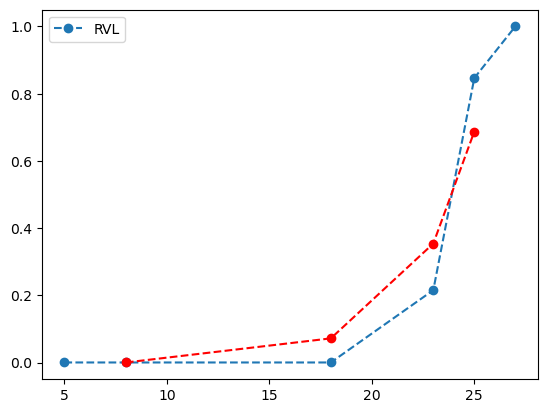

In [502]:
elec_i=11
muscle_i=8


# for muscle_i in range(0,len(mt_muscles)):
for muscle_i in [5]:
    ## Get rid of nan values
    peak_peak_values=np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]) # turn tensor into array
    mask = ~np.isnan(peak_peak_values) # search for posistions of nan values
    ydata=peak_peak_values[mask] # set y without nan values
    #multiply amplitdes by 10 ,to make sure they are
    xdata = np.array(unique_amplitudes["amplitudes"][mask]) *10 # set x for y

    filt= np.ones(3)/3 # setting window to three points
    
    ydata_smooth= np.convolve(ydata, filt, mode="valid")
    plt.plot(xdata, ydata, "o--", label=mt_muscles["muscle_name"][muscle_i])
    plt.plot(xdata[1:-1], ydata_smooth, "o--", c="red")
    plt.legend()
    plt.show()

In [375]:
elec_i=5
muscle_i=2

## Get rid of nan values
peak_peak_values=np.array(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0]) # turn tensor into array
mask = ~np.isnan(peak_peak_values) # search for posistions of nan values
ydata=peak_peak_values[mask] # set y without nan values
#multiply amplitdes by 10 ,to make sure they are
xdata = np.array(unique_amplitudes["amplitudes"][mask]) *10 # set x for y

# Version assuming max value is at higher amplitude

In [ ]:
# Neala version  original


import numpy as np
import pylab
from scipy.optimize import curve_fit


data_structure= "max_P2P_div_amp"

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y
# k>0

# Take slice of tensor and get rid of nan values
peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[muscle_i,elec_i,:,0,0]) #Convert tensor slice to df
peak_peak_values=peak_peak_values.dropna() #Get rid of nan values
peak_peak_values=np.array(peak_peak_values[0]) #Convert to np array
# Set values to plot for original data
xdata=np.arange(0, len(peak_peak_values)) 
ydata=peak_peak_values

# Set the given amplitudes as a x-label
amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[muscle_i,elec_i,:])
amplitudes=amplitudes.dropna()
amplitudes=np.array(amplitudes[0])

# Find Optimal values for the parameters( popt) so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

# Set values to plot for interpolated data
x = np.linspace(-1, 15, 50) # How did I set this parameter ? 
y = sigmoid(x, *popt)

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel("Peak to peak value [mV]")
plt.xlabel("Amplitudes [mA]")
plt.title(f"Sigmoid fit asymptotic value after max data value,  elec: {elec_i}, muscle: {mt_muscles['muscle_name'][muscle_i]}")
ticks=np.arange(0, len(amplitudes))
labels=amplitudes
ax.set_xticks(ticks, labels=labels)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')

#Get original peak to peak, without dividing by amplitude, otherwise overfitting?
# ## Define Textbox
# axbox = fig.add_axes([0, 1.0, 1.0, 0.05]) #[left, bottom, width, height]
# text_box = TextBox(axbox,label=None, textalignment="center")
# text_box.set_val(f"Normalisation method: {data_structure}")  # Trigger `submit` with the initial string.

pylab.show()

[4.81608384 0.92039473]


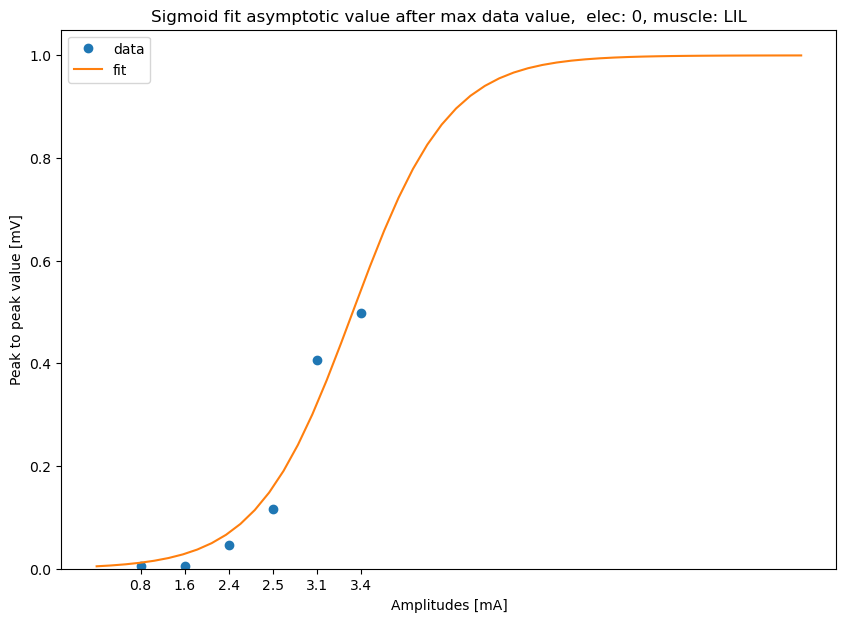

In [128]:
# Neala version 


import numpy as np
import pylab
from scipy.optimize import curve_fit


data_structure= "max_P2P_div_amp"

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y
# k>0

# Take slice of tensor and get rid of nan values
peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[muscle_i,elec_i,:,0,0]) #Convert tensor slice to df
peak_peak_values=peak_peak_values.dropna() #Get rid of nan values
peak_peak_values=np.array(peak_peak_values[0]) #Convert to np array
# Set values to plot for original data
xdata=np.arange(0, len(peak_peak_values)) 
ydata=peak_peak_values

# Set the given amplitudes as a x-label
amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[muscle_i,elec_i,:])
amplitudes=amplitudes.dropna()
amplitudes=np.array(amplitudes[0])

# Find Optimal values for the parameters( popt) so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

# Set values to plot for interpolated data
x = np.linspace(-1, 15, 50) # How did I set this parameter ? 
y = sigmoid(x, *popt)

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel("Peak to peak value [mV]")
plt.xlabel("Amplitudes [mA]")
plt.title(f"Sigmoid fit asymptotic value after max data value,  elec: {elec_i}, muscle: {mt_muscles['muscle_name'][muscle_i]}")
ticks=np.arange(0, len(amplitudes))
labels=amplitudes
ax.set_xticks(ticks, labels=labels)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')

#Get original peak to peak, without dividing by amplitude, otherwise overfitting?
# ## Define Textbox
# axbox = fig.add_axes([0, 1.0, 1.0, 0.05]) #[left, bottom, width, height]
# text_box = TextBox(axbox,label=None, textalignment="center")
# text_box.set_val(f"Normalisation method: {data_structure}")  # Trigger `submit` with the initial string.

pylab.show()